In [2]:
#data science packages
import pandas as pd
import numpy as np

#visualisation packages
import plotly.io as pio
import plotly.graph_objects as go
import pyreadstat
import matplotlib.pyplot as plt
import matplotlib.colorbar as mcb
import seaborn as sns

#packages needed to plot on a map
from adjustText import adjust_text
import pyogrio
import geopandas as gpd
import pycountry


In [3]:
pio.renderers.default='notebook'
import plotly.offline as pyo
pyo.init_notebook_mode()

In [4]:
df, meta = pyreadstat.read_sav("lrf_wrp_2021_full_data.sav")
df.head()

WPID_RANDOM  WP5        Country       WGT    Year  GlobalRegion  \
0  174262180.0  1.0  United States  2.132627  2021.0           6.0   
1  115327451.0  1.0  United States  0.620385  2021.0           6.0   
2  189972125.0  1.0  United States  0.610080  2021.0           6.0   
3  173358289.0  1.0  United States  0.490774  2021.0           6.0   
4  183251831.0  1.0  United States  1.910021  2021.0           6.0   

   country.in.both.waves  CountryIncomeLevel2021  CountryIncomeLevel2019  \
0                    1.0                     4.0                     NaN   
1                    1.0                     4.0                     NaN   
2                    1.0                     4.0                     NaN   
3                    1.0                     4.0                     NaN   
4                    1.0                     4.0                     NaN   

     PROJWT_2021  ...  REGION_ZAF  REGION2_ZMB  REGION_ZWE  Q2_1_2019A  \
0  562058.627707  ...         NaN          NaN         NaN         NaN   
1  163503.920074  ...         NaN          NaN         NaN         NaN   
2  160787.958907  ...         NaN          NaN         NaN         NaN   
3  129344.456130  ...         NaN          NaN         NaN         NaN   
4  503390.265930  ...         NaN          NaN         NaN         NaN   

   Q2_1_2019B  Q5A_2019  Q5B_2019  Q5C_2019  Q5D_2019  Q5F_2019  
0         NaN       NaN       NaN       NaN       NaN       NaN  
1         NaN       NaN       NaN       NaN       NaN       NaN  
2         NaN       NaN       NaN       NaN       NaN       NaN  
3         NaN       NaN       NaN       NaN       NaN       NaN  
4         NaN       NaN       NaN       NaN       NaN       NaN  

[5 rows x 208 columns]

In [5]:

#filter out countries with number of data points less than 1200
df = df.groupby('Country').filter(lambda x: x['Country'].count() >= 1200)

df_1=df[df['Q1'].isnull()]

Plot the number of participants from each country

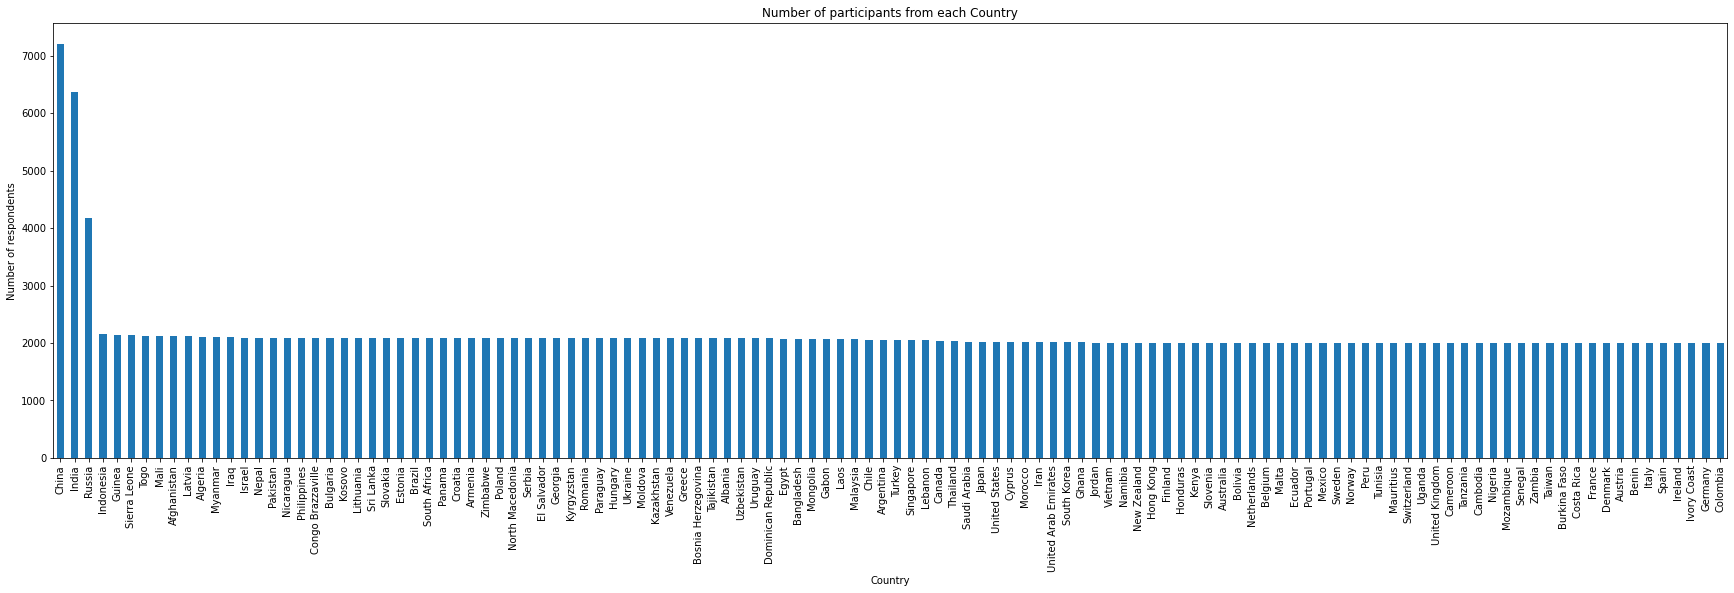

In [6]:
chart = df['Country'].value_counts().plot(kind='bar',
                                    figsize=(30,8),
                                    title="Number of participants from each Country")
chart.set_xlabel("Country")
chart.set_ylabel("Number of respondents")
plt.xticks(rotation = 90)
plt.show()

Most participants are from China, India, and Russia

# Step 1: Simple Exploratory Data Analysis

## Step 1.1. Just some simple bar charts

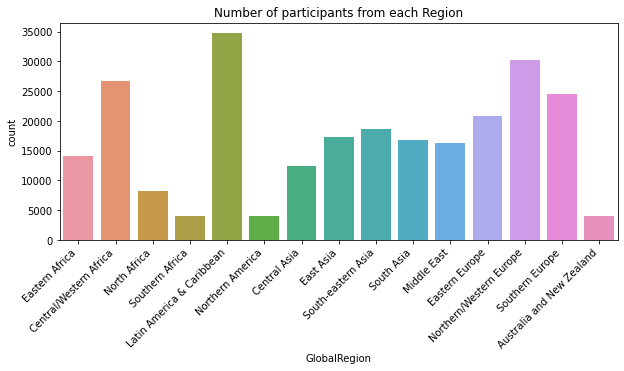

In [7]:
plt.figure(figsize=(10,4))
chart=sns.countplot(x='GlobalRegion', data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
chart.set_xticklabels(['Eastern Africa','Central/Western Africa','North Africa','Southern Africa','Latin America & Caribbean','Northern America','Central Asia','East Asia','South-eastern Asia','South Asia','Middle East','Eastern Europe','Northern/Western Europe','Southern Europe','Australia and New Zealand'])
chart.set_title('Number of participants from each Region')
plt.show()

Global region wise, most of the participants are from Latin America & Caribbean, Nothern/western Europe, and Central Western Africa.

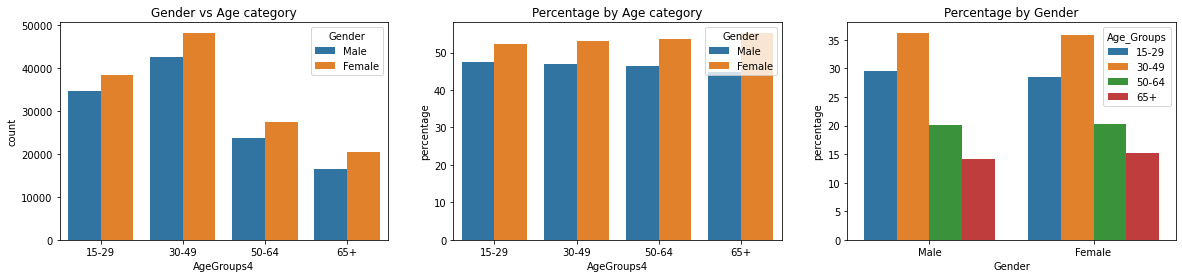

In [8]:
# Define the mapping of values to labels
age_labels = {1: '15-29', 2: '30-49', 3: '50-64', 4: '65+'}
gender_labels = {1: 'Male', 2: 'Female'}

# Create the plot
fig, axes = plt.subplots(1,3,figsize=(20,4))
#chart = sns.countplot(x='AgeGroups4', data=df, hue='Gender', hue_order=[1, 2], width=0.4, ax=axes[0])
chart = sns.countplot(x='AgeGroups4', data=df, hue='Gender', hue_order=[1, 2], ax=axes[0])
sns.move_legend(chart, "upper right", title='Gender')
chart.set_xticks([0, 1, 2, 3])
chart.set_title("Gender vs Age category")

# Rename the x-axis tick labels
new_labels = [age_labels[val] for val in range(1, 5)]
chart.set_xticklabels(new_labels)

# Rename the legend labels
handles, labels = axes[0].get_legend_handles_labels()
new_labels = [gender_labels[int(label)] for label in labels]
axes[0].legend(handles, new_labels, title='Gender')


grouped = df.groupby(['AgeGroups4', 'Gender']).size().reset_index(name='count')
totals = grouped.groupby('AgeGroups4')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='AgeGroups4')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100

# Create the plot
#chart = sns.barplot(x='AgeGroups4', y='percentage', hue='Gender', data=grouped, hue_order=[1, 2], width=0.4,ax=axes[1])
chart = sns.barplot(x='AgeGroups4', y='percentage', hue='Gender', data=grouped, hue_order=[1, 2], ax=axes[1])

sns.move_legend(chart, "upper right", title='Gender')
chart.set_xticklabels([age_labels[val] for val in range(1, 5)])
chart.set_title("Percentage by Age category")

# Rename the legend labels
handles, labels = axes[1].get_legend_handles_labels()
new_labels = [gender_labels[int(label)] for label in labels]
axes[1].legend(handles, new_labels, title='Gender')

grouped_1 = df.groupby(['Gender', 'AgeGroups4']).size().reset_index(name='count')
totals = grouped_1.groupby('Gender')['count'].sum().reset_index(name='total')
grouped_1 = pd.merge(grouped_1, totals, on='Gender')
grouped_1['percentage'] = grouped_1['count'] / grouped_1['total'] * 100

# Create the plot
#chart = sns.barplot(x='Gender', y='percentage', hue='AgeGroups4', data=grouped_1, hue_order=[1, 2,3,4], width=0.4,ax=axes[2])
chart = sns.barplot(x='Gender', y='percentage', hue='AgeGroups4', data=grouped_1, hue_order=[1, 2,3,4], ax=axes[2])

sns.move_legend(chart, "upper right", title='AgeGroups4')

chart.set_xticklabels([gender_labels[val] for val in range(1, 3)])
chart.set_title("Percentage by Gender")

# Rename the legend labels
handles, labels = axes[2].get_legend_handles_labels()
new_labels = [age_labels[int(label)] for label in labels]
axes[2].legend(handles, new_labels, title='Age_Groups')

# Show the plot
plt.show()


It is clear by from the counts graphs, the female participants are higher in all the age categories. The highest percentage of females by age category is from 'above 65+' age category. And the highest percentage of males from age group 15-29.

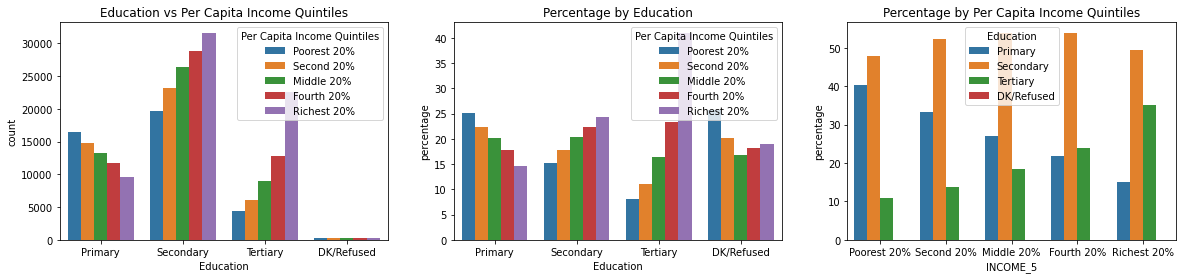

In [9]:
# Define the mapping of values to labels
edu_labels = {1: 'Primary', 2: 'Secondary', 3: 'Tertiary', 4: 'DK/Refused'}
income_labels = {1: 'Poorest 20%', 2: 'Second 20%', 3: 'Middle 20%', 4: 'Fourth 20%', 5: 'Richest 20%'}

# Create the plot
fig, axes = plt.subplots(1,3,figsize=(20,4))
#chart = sns.countplot(x='Education', data=df, hue='INCOME_5', hue_order=[1, 2,3,4,5], width=0.4, ax=axes[0])
chart = sns.countplot(x='Education', data=df, hue='INCOME_5', hue_order=[1, 2,3,4,5], ax=axes[0])

sns.move_legend(chart, "upper right", title='Per Capita Income Quintiles')
chart.set_xticks([0, 1, 2, 3])
chart.set_title("Education vs Per Capita Income Quintiles")

# Rename the x-axis tick labels
new_labels = [edu_labels[val] for val in range(1, 5)]
chart.set_xticklabels(new_labels)

# Rename the legend labels
handles, labels = axes[0].get_legend_handles_labels()
new_labels = [income_labels[int(label)] for label in labels]
axes[0].legend(handles, new_labels, title='Per Capita Income Quintiles')


grouped = df.groupby(['Education', 'INCOME_5']).size().reset_index(name='count')
totals = grouped.groupby('Education')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='Education')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100

# Create the plot
chart = sns.barplot(x='Education', y='percentage', hue='INCOME_5', data=grouped, hue_order=[1, 2,3,4,5], ax=axes[1])
sns.move_legend(chart, "upper right", title='Per Capita Income Quintiles')
chart.set_xticklabels([edu_labels[val] for val in range(1, 5)])
chart.set_title("Percentage by Education")

# Rename the legend labels
handles, labels = axes[1].get_legend_handles_labels()
new_labels = [income_labels[int(label)] for label in labels]
axes[1].legend(handles, new_labels, title='Per Capita Income Quintiles')

grouped_1 = df.groupby(['INCOME_5', 'Education']).size().reset_index(name='count')
totals = grouped_1.groupby('INCOME_5')['count'].sum().reset_index(name='total')
grouped_1 = pd.merge(grouped_1, totals, on='INCOME_5')
grouped_1['percentage'] = grouped_1['count'] / grouped_1['total'] * 100

# Create the plot
chart = sns.barplot(x='INCOME_5', y='percentage', hue='Education', data=grouped_1, hue_order=[1, 2,3,4], ax=axes[2])
sns.move_legend(chart, "upper right", title='Education')
chart.set_xticklabels([income_labels[val] for val in range(1, 6)])
chart.set_title("Percentage by Per Capita Income Quintiles")

# Rename the legend labels
handles, labels = axes[2].get_legend_handles_labels()
new_labels = [edu_labels[int(label)] for label in labels]
axes[2].legend(handles, new_labels, title='Education')

# Show the plot
plt.show()

Most percentage of people with secondary and thirtiary education are from richest 20%. However when the percentages are calsulated by percapita income levels the highest percentages for all income categories are from secondary eduvated people which suggest most of the students stop thir esducation from secondary level without any university education.

Question 1 : Feel More, Less or About as Safe Compared With Five Years Ago

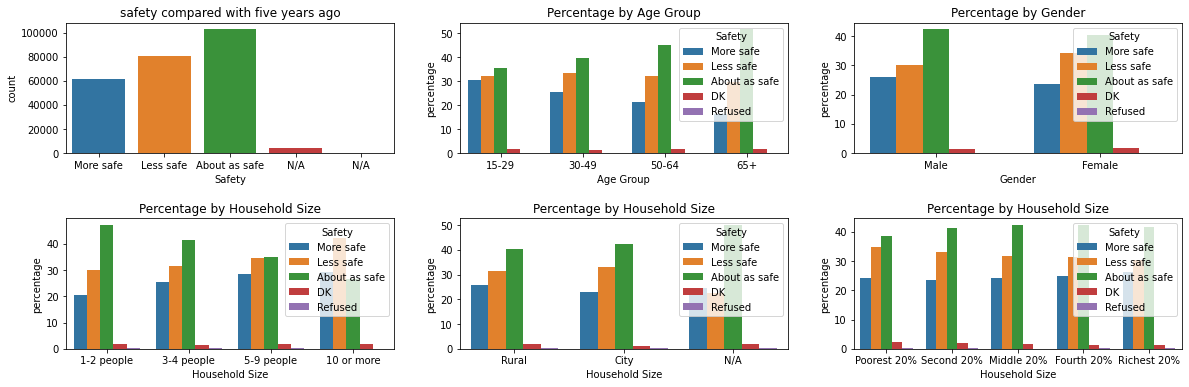

In [10]:
# Define the mapping of values to labels
safety_labels = {1: 'More safe', 2: 'Less safe', 3: 'About as safe', 98: 'DK', 99: 'Refused'}
age_labels = {1: '15-29', 2: '30-49', 3: '50-64', 4: '65+'}
gender_labels = {1: 'Male', 2: 'Female'}
housesize_labels = {1: '1-2 people', 2: '3-4 people', 3: '5-9 people', 4: '10 or more'}
urban_labels = {1: 'Rural', 2: 'City', 9: 'DK/Refused'}
income_labels = {1: 'Poorest 20%', 2: 'Second 20%', 3: 'Middle 20%', 4: 'Fourth 20%', 5: 'Richest 20%'}

# Create the plot
fig, axes = plt.subplots(2,3,figsize=(20,6))

chart=sns.countplot(x='Q1', data=df,  ax=axes[0,0]);
chart.set_xticks([0,1,2,3,4])
chart.set_title("safety compared with five years ago")
# Set the x-axis tick labels
new_labels = [safety_labels[val] if val in safety_labels else "N/A" for val in range(1, 6)]
chart.set_xticklabels(new_labels)
chart.set_xlabel('Safety')


grouped = df.groupby(['AgeGroups4', 'Q1']).size().reset_index(name='count')
totals = grouped.groupby('AgeGroups4')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='AgeGroups4')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100
# Create the plot
chart = sns.barplot(x='AgeGroups4', y='percentage', hue='Q1', data=grouped, hue_order=[1, 2,3,98,99], ax=axes[0,1])
sns.move_legend(chart, "upper right", title='Safety')
chart.set_xticklabels([age_labels[val] for val in range(1, 5)])
chart.set_title("Percentage by Age Group")
chart.set_xlabel('Age Group')
# Rename the legend labels
handles, labels = axes[0,1].get_legend_handles_labels()
new_labels = [safety_labels[int(label)] for label in labels]
axes[0,1].legend(handles, new_labels, title='Safety')

grouped = df.groupby(['Gender', 'Q1']).size().reset_index(name='count')
totals = grouped.groupby('Gender')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='Gender')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100
# Create the plot
chart = sns.barplot(x='Gender', y='percentage', hue='Q1', data=grouped, hue_order=[1, 2,3,98,99], ax=axes[0,2])
sns.move_legend(chart, "upper right", title='Safety')
chart.set_xticklabels([gender_labels[val] for val in range(1, 3)])
chart.set_title("Percentage by Gender")
chart.set_xlabel('Gender')
# Rename the legend labels
handles, labels = axes[0,2].get_legend_handles_labels()
new_labels = [safety_labels[int(label)] for label in labels]
axes[0,2].legend(handles, new_labels, title='Safety')

grouped = df.groupby(['HouseholdSize', 'Q1']).size().reset_index(name='count')
totals = grouped.groupby('HouseholdSize')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='HouseholdSize')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100
# Create the plot
chart = sns.barplot(x='HouseholdSize', y='percentage', hue='Q1', data=grouped, hue_order=[1, 2,3,98,99],ax=axes[1,0])
sns.move_legend(chart, "upper right", title='Safety')
chart.set_xticklabels([housesize_labels[val] for val in range(1, 5)])
chart.set_title("Percentage by Household Size")
chart.set_xlabel('Household Size')
# Rename the legend labels
handles, labels = axes[1,0].get_legend_handles_labels()
new_labels = [safety_labels[int(label)] for label in labels]
axes[1,0].legend(handles, new_labels, title='Safety')

grouped = df.groupby(['Urbanicity', 'Q1']).size().reset_index(name='count')
totals = grouped.groupby('Urbanicity')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='Urbanicity')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100
# Create the plot
chart = sns.barplot(x='Urbanicity', y='percentage', hue='Q1', data=grouped, hue_order=[1, 2,3,98,99], ax=axes[1,1])
sns.move_legend(chart, "upper right", title='Safety')
chart.set_xticklabels([urban_labels[val] if val in urban_labels else "N/A" for val in range(1, 4)])
chart.set_title("Percentage by Household Size")
chart.set_xlabel('Household Size')
# Rename the legend labels
handles, labels = axes[1,1].get_legend_handles_labels()
new_labels = [safety_labels[int(label)] for label in labels]
axes[1,1].legend(handles, new_labels, title='Safety')

grouped = df.groupby(['INCOME_5', 'Q1']).size().reset_index(name='count')
totals = grouped.groupby('INCOME_5')['count'].sum().reset_index(name='total')
grouped = pd.merge(grouped, totals, on='INCOME_5')
grouped['percentage'] = grouped['count'] / grouped['total'] * 100
# Create the plot
chart = sns.barplot(x='INCOME_5', y='percentage', hue='Q1', data=grouped, hue_order=[1, 2,3,98,99],ax=axes[1,2])
sns.move_legend(chart, "upper right", title='Safety')
chart.set_xticklabels([income_labels[val] for val in range(1, 6)])
chart.set_title("Percentage by Household Size")
chart.set_xlabel('Household Size')
# Rename the legend labels
handles, labels = axes[1,2].get_legend_handles_labels()
new_labels = [safety_labels[int(label)] for label in labels]
axes[1,2].legend(handles, new_labels, title='Safety')

# Adjust horizontal space between subplots
fig.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()



Based on the safety propotion by Gender, highest percentage of males confims that they are safe (more safe and about as safe), while highest percentage of females feels that they are unsafe. Based on safety propotion by Age Group, highest percentsge of older paerticipants (over 65 years of age) feels that they are about as safe.  The percentage of peoples with more that 10 or more memebers feels that they are unsafe. The higher percentage of people in rural area feel that they are more safe that city people. 

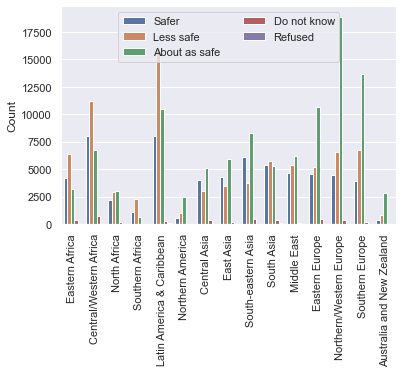

In [11]:
sns.set(font_scale=1)
#fig, axes = plt.subplots(figsize=(12,4))

#fig.suptitle('Feel More, Less or About as Safe Compared With Five Years Ago')
g1=sns.countplot(x='GlobalRegion', data=df, hue='Q1');
g1.legend(loc='upper center',ncol=2, labels=['Safer','Less safe','About as safe','Do not know','Refused'])
#sns.move_legend(g1, "upper right", title='Safety', labels=['More safe','Less safe','About as safe','DK','Refused'])
g1.set_xticklabels(g1.get_xticklabels(), rotation = 90)
g1.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
g1.set_xticklabels(['Eastern Africa','Central/Western Africa','North Africa','Southern Africa','Latin America & Caribbean','Northern America','Central Asia','East Asia','South-eastern Asia','South Asia','Middle East','Eastern Europe','Northern/Western Europe','Southern Europe','Australia and New Zealand'])
g1.set_xlabel('')
g1.set_ylabel('Count')


plt.savefig('Figures/safety_region.pdf',bbox_inches="tight")
plt.show()

All the African regions except North Africa, Latin & Carribian region feels that they are less safe while North American, Asia, Middle east Europe, and Acutralia/NZ areas feels that they are safe.

Here, the highest propotion of pasific (NZ and Ausi) participants followed by Europeans show that they are feeling about as safe compared to last five years. However when considering north and south americans as one, highest propositon of them feels that they are less safe followed by Africans. As compared with above count graph, the feeling of safety from north and south americans are completely opposite. So below graphs comapre the propotions seperately

Q2_1 - Riska to safety

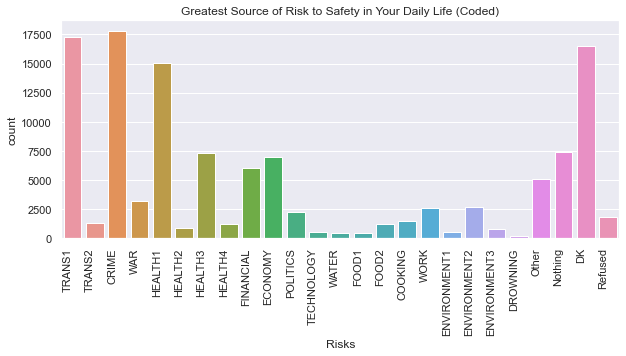

In [12]:
plt.figure(figsize=(10,4))
chart=sns.countplot(x='Q2_1', data=df);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.set_xlabel('Risks')
chart.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
chart.set_xticklabels(['TRANS1','TRANS2','CRIME','WAR','HEALTH1','HEALTH2','HEALTH3','HEALTH4','FINANCIAL','ECONOMY','POLITICS','TECHNOLOGY','WATER','FOOD1','FOOD2','COOKING','WORK','ENVIRONMENT1','ENVIRONMENT2','ENVIRONMENT3','DROWNING','Other','Nothing','DK','Refused'])
chart.set_title('Greatest Source of Risk to Safety in Your Daily Life (Coded)')
plt.savefig('Figures/risks.pdf')
plt.show()


People found transportation, crime/ violance, and personal health related issues are the most risky sources for daily lives.

when the age increases above 60 years, People start to worry about personal health and cooking and other household accidents.  Technology as a risk to safety affects to all peoplr irrespective of their age.

When comparing the risks regin wise, we can see that Asians risks health issues and Pacifics and Europeans are more concerning over transpotation related isuues. Americans and Africans risk crime related issues. 

## Step 1.2: Spider chart of each region perception to risks and experience to disasters

In [13]:
df = df.astype({"GlobalRegion": int})
Africa = ['Eastern Africa','Central/Western Africa','North Africa','Southern Africa']
AmericaANZ = ['Latin America & Caribbean','Northern America','Australia and New Zealand']
Asia = ['Central Asia','East Asia','South-eastern Asia','South Asia','Middle East']
Europe = ['Eastern Europe','Northern/Western Europe','Southern Europe']

In [14]:
#Make Africa Scatterpolar chart
Region = Africa
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q4A','Q4B','Q4C','Q4D','Q4E','Q4F','Q4G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)

fig = go.Figure( layout=layout)

for m in range(1,4):
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<4]
    dfm.replace({3: 0, 2: 0.5}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[m],
        fill='toself'
        
    ))

min_value = 0
max_value = 0.8

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_perception_Africa.pdf')
#fig.write_image('./Figures/Risks_perception_Africa.pdf') 
fig.show()

In [15]:
#Make AmericaANZ Scatterpolar chart
Region = AmericaANZ
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q4A','Q4B','Q4C','Q4D','Q4E','Q4F','Q4G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in [5,6,15]:
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<4]
    dfm.replace({3: 0, 2: 0.5}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.8

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_perception_AmericaANZ.pdf') 
fig.show()

In [16]:
#Make Asia Scatterpolar chart
Region = Asia
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q4A','Q4B','Q4C','Q4D','Q4E','Q4F','Q4G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in range(7,12):
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<4]
    dfm.replace({3: 0, 2: 0.5}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.8

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_perception_Asia.pdf') 
fig.show()

In [17]:
#Make Europe Scatterpolar chart
Region = Europe
Categories = ['Food','Water','Crime','Serious Weather','Traffic','Mental health','Work accident']
Col = ['Q4A','Q4B','Q4C','Q4D','Q4E','Q4F','Q4G']
layout = go.Layout(
    autosize=True,  # Enable autosizing
    width=500,  # Adjust the width of the plot
    height=400,  # Adjust the height of the plot
    margin=dict(l=5, r=0, t=15, b=2)  # Set the left, right, top, and bottom margins to zero
)
fig = go.Figure(layout=layout)
count0=0
for m in [12,13,14]:
    dfm = df.loc[df.GlobalRegion==m,Col]
    dfm.dropna(inplace=True)
    dfm = dfm[dfm<4]
    dfm.replace({3: 0, 2: 0.5}, inplace=True)
    value= dfm.mean()

    fig.add_trace(go.Scatterpolar(
        theta=Categories,
        r=value,
        name=Region[count0],
        fill='toself'
        
    ))
    count0+=1

min_value = 0
max_value = 0.8

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            range=[min_value, max_value]  # Set the minimum and maximum values for the r-axis
        )
    ),
    legend=dict(yanchor="top", y=-0.15, xanchor="left", x=0.4),
    legend_orientation="v"
)

pio.write_image(fig,'./Figures/Risks_perception_Europe.pdf') 
fig.show()

In [18]:
df_n = df.drop(df[(df['Q5E'] > 3)].index)
df_n = df_n.drop(df_n[(df_n['Q4E'] > 3)].index)

Most are worried on traffic and accidents based on accidents happen to others (2)

Considering overall, only contral/western African propotion very worried is higher than not worried.
only considering only very worried Asian and african people worried that the work they do could cause seriouse harm

In [19]:
def get_country_acronym(country_name):
    try:
        country = pycountry.countries.search_fuzzy(country_name)[0]
        return country.alpha_3
    except LookupError:
        return None

# Assuming you have a pandas DataFrame named 'df' and the country names are in a column named 'Country'
unique_countries = df['Country'].unique()

country_acronyms = {country: get_country_acronym(country) for country in unique_countries}

#fix the country acronym that is not available in the pycountry package
country_acronyms['Laos']='LAO'
country_acronyms['Bosnia Herzegovina']='BiH'
country_acronyms['Congo Brazzaville'] = 'CG'
country_acronyms['Ivory Coast'] = 'IC'

# Update country names to acronyms
df['Country_short'] = df['Country'].map(country_acronyms)
df.head()


WPID_RANDOM  WP5        Country       WGT    Year  GlobalRegion  \
0  174262180.0  1.0  United States  2.132627  2021.0             6   
1  115327451.0  1.0  United States  0.620385  2021.0             6   
2  189972125.0  1.0  United States  0.610080  2021.0             6   
3  173358289.0  1.0  United States  0.490774  2021.0             6   
4  183251831.0  1.0  United States  1.910021  2021.0             6   

   country.in.both.waves  CountryIncomeLevel2021  CountryIncomeLevel2019  \
0                    1.0                     4.0                     NaN   
1                    1.0                     4.0                     NaN   
2                    1.0                     4.0                     NaN   
3                    1.0                     4.0                     NaN   
4                    1.0                     4.0                     NaN   

     PROJWT_2021  ...  REGION2_ZMB  REGION_ZWE  Q2_1_2019A  Q2_1_2019B  \
0  562058.627707  ...          NaN         NaN         NaN         NaN   
1  163503.920074  ...          NaN         NaN         NaN         NaN   
2  160787.958907  ...          NaN         NaN         NaN         NaN   
3  129344.456130  ...          NaN         NaN         NaN         NaN   
4  503390.265930  ...          NaN         NaN         NaN         NaN   

   Q5A_2019  Q5B_2019  Q5C_2019  Q5D_2019  Q5F_2019  Country_short  
0       NaN       NaN       NaN       NaN       NaN            USA  
1       NaN       NaN       NaN       NaN       NaN            USA  
2       NaN       NaN       NaN       NaN       NaN            USA  
3       NaN       NaN       NaN       NaN       NaN            USA  
4       NaN       NaN       NaN       NaN       NaN            USA  

[5 rows x 209 columns]

In [20]:
lands = gpd.read_file("./shapefiles/continent.shp")
lands = lands[lands['CONTINENT'] != 'Antarctica']
lands

CONTINENT                                           geometry
0           Asia  MULTIPOLYGON (((93.27554 80.26361, 93.31304 80...
1  North America  MULTIPOLYGON (((-25.28167 71.39166, -25.32889 ...
2         Europe  MULTIPOLYGON (((58.06138 81.68776, 57.98055 81...
3         Africa  MULTIPOLYGON (((0.69465 5.77337, 0.66667 5.803...
4  South America  MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ...
5        Oceania  MULTIPOLYGON (((-177.39334 28.18416, -177.3958...
6      Australia  MULTIPOLYGON (((142.27997 -10.26556, 142.21053...

In [21]:
regions = gpd.read_file("./shapefiles/World_Countries__Generalized_.shp")
regions = regions[regions['COUNTRY'] != 'Antarctica']
regions = regions[['COUNTRY','geometry']]
regions

COUNTRY                                           geometry
0          Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...
1              Albania  POLYGON ((19.57083 41.68527, 19.58195 41.69569...
2              Algeria  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...
3       American Samoa  POLYGON ((-170.74390 -14.37555, -170.74942 -14...
4              Andorra  POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...
..                 ...                                                ...
246            Vietnam  MULTIPOLYGON (((107.07896 17.10804, 107.08333 ...
247  Wallis and Futuna  MULTIPOLYGON (((-178.06082 -14.32389, -178.137...
248              Yemen  MULTIPOLYGON (((47.25445 13.61528, 47.16888 13...
249             Zambia  POLYGON ((30.21302 -14.98172, 30.21916 -15.096...
250           Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...

[250 rows x 2 columns]

In [22]:
regions['COUNTRY'] = regions['COUNTRY'].replace('Russian Federation', 'Russia')
regions['COUNTRY'] = regions['COUNTRY'].replace('Bosnia and Herzegovina', 'Bosnia Herzegovina')
regions['COUNTRY'] = regions['COUNTRY'].replace('Congo', 'Congo Brazzaville')
regions['COUNTRY'] = regions['COUNTRY'].replace('Palestinian Territory', 'Palestine')
regions['COUNTRY'] = regions['COUNTRY'].replace('Turkiye', 'Turkey')
regions['COUNTRY'] = regions['COUNTRY'].replace("Côte d'Ivoire", 'Ivory Coast')


In [23]:
#Extracting colums of countru and risks from df
df_1=df[["Country", "Q2_1","GlobalRegion"]].copy()
#then change the name of some countries
df_1['Country'] = df_1['Country'].replace('Hong Kong', 'China');
df_1['Country'] = df_1['Country'].replace('Taiwan', 'China');
df_1['Country'] = df_1['Country'].replace('Kosovo', 'Serbia');

In [24]:
df_1 = df_1.dropna(subset=['Q2_1'])
df_1 = df_1[~df_1['Q2_1'].isin([98, 99])]
df_1

Country  Q2_1  GlobalRegion
1       United States   7.0             6
2       United States   3.0             6
3       United States   3.0             6
4       United States  10.0             6
5       United States   1.0             6
...               ...   ...           ...
125905         Serbia   7.0            12
125907         Serbia  10.0            12
125908         Serbia   5.0            12
125909         Serbia   7.0            12
125910         Serbia  18.0            12

[102149 rows x 3 columns]

In [25]:
# Create a dictionary to map numerical codes to risk labels
risk_labels = {
    1: 'TRANS1',
    2: 'TRANS2',
    3: 'CRIME',
    4: 'WAR',
    5: 'HEALTH1',
    6: 'HEALTH2',
    7: 'HEALTH3',
    8: 'HEALTH4',
    9: 'FINANCIAL',
    10: 'ECONOMY',
    11: 'POLITICS',
    12: 'TECHNOLOGY',
    13: 'WATER',
    14: 'FOOD1',
    15: 'FOOD2',
    16: 'COOKING',
    17: 'WORK',
    18: 'ENVIRONMENT1',
    19: 'ENVIRONMENT2',
    20: 'ENVIRONMENT3',
    21: 'DROWNING',
    22: 'Other',
    23: 'Nothing',
}

# Replace numerical codes with risk labels using the map() method
df_1['risk_category'] = df_1['Q2_1'].map(risk_labels)
#drop NaN raws
# df_1 = df_1.dropna(subset=['risk_category'])
df_1


Country  Q2_1  GlobalRegion risk_category
1       United States   7.0             6       HEALTH3
2       United States   3.0             6         CRIME
3       United States   3.0             6         CRIME
4       United States  10.0             6       ECONOMY
5       United States   1.0             6        TRANS1
...               ...   ...           ...           ...
125905         Serbia   7.0            12       HEALTH3
125907         Serbia  10.0            12       ECONOMY
125908         Serbia   5.0            12       HEALTH1
125909         Serbia   7.0            12       HEALTH3
125910         Serbia  18.0            12  ENVIRONMENT1

[102149 rows x 4 columns]

In [26]:
globalregion_labels = {
    1: 'Eastern Africa',
    2: 'Central/Western Africa',
    3: 'North Africa',
    4: 'Southern Africa',
    5: 'Latin America & Caribbean',
    6: 'Northern America',
    7: 'Central Asia',
    8: 'East Asia',
    9: 'South-eastern Asia',
    10: 'South Asia',
    11: 'Middle East',
    12: 'Eastern Europe',
    13: 'Northern/Western Europe',
    14: 'Southern Europe',
    15: 'Australia and New Zealand',
}

# Replace numerical codes with risk labels using the map() method
df_1['globalregion_category'] = df_1['GlobalRegion'].map(globalregion_labels)
#drop NaN raws
# df_1 = df_1.dropna(subset=['globalregion_category'])
df_1

Country  Q2_1  GlobalRegion risk_category globalregion_category
1       United States   7.0             6       HEALTH3      Northern America
2       United States   3.0             6         CRIME      Northern America
3       United States   3.0             6         CRIME      Northern America
4       United States  10.0             6       ECONOMY      Northern America
5       United States   1.0             6        TRANS1      Northern America
...               ...   ...           ...           ...                   ...
125905         Serbia   7.0            12       HEALTH3        Eastern Europe
125907         Serbia  10.0            12       ECONOMY        Eastern Europe
125908         Serbia   5.0            12       HEALTH1        Eastern Europe
125909         Serbia   7.0            12       HEALTH3        Eastern Europe
125910         Serbia  18.0            12  ENVIRONMENT1        Eastern Europe

[102149 rows x 5 columns]

In [27]:
# Merge world data base with Risk Poll data base
merged = regions.merge(df_1, left_on='COUNTRY', right_on='Country')
#merged = merged.drop(merged[merged['Q2_1'] > 25].index)
merged

COUNTRY                                           geometry  \
0       Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
1       Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
2       Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
3       Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
4       Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
...             ...                                                ...   
102144     Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...   
102145     Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...   
102146     Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...   
102147     Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...   
102148     Zimbabwe  POLYGON ((32.48887 -21.34445, 32.46541 -21.325...   

            Country  Q2_1  GlobalRegion risk_category globalregion_category  
0       Afghanistan   4.0            10           WAR            South Asia  
1       Afghanistan  10.0            10       ECONOMY            South Asia  
2       Afghanistan   4.0            10           WAR            South Asia  
3       Afghanistan   4.0            10           WAR            South Asia  
4       Afghanistan   4.0            10           WAR            South Asia  
...             ...   ...           ...           ...                   ...  
102144     Zimbabwe  10.0             1       ECONOMY        Eastern Africa  
102145     Zimbabwe   1.0             1        TRANS1        Eastern Africa  
102146     Zimbabwe  23.0             1       Nothing        Eastern Africa  
102147     Zimbabwe  15.0             1         FOOD2        Eastern Africa  
102148     Zimbabwe   3.0             1         CRIME        Eastern Africa  

[102149 rows x 7 columns]

In [28]:
merged_first = merged.groupby('Country').first().reset_index()
merged_first = merged_first.drop(['Q2_1', 'risk_category','GlobalRegion','COUNTRY','GlobalRegion'], axis=1)

Let's see if we can plot countries on a map

/Users/mkie815/opt/anaconda3/envs/ml/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning:

Only specify one of 'column' or 'color'. Using 'color'.



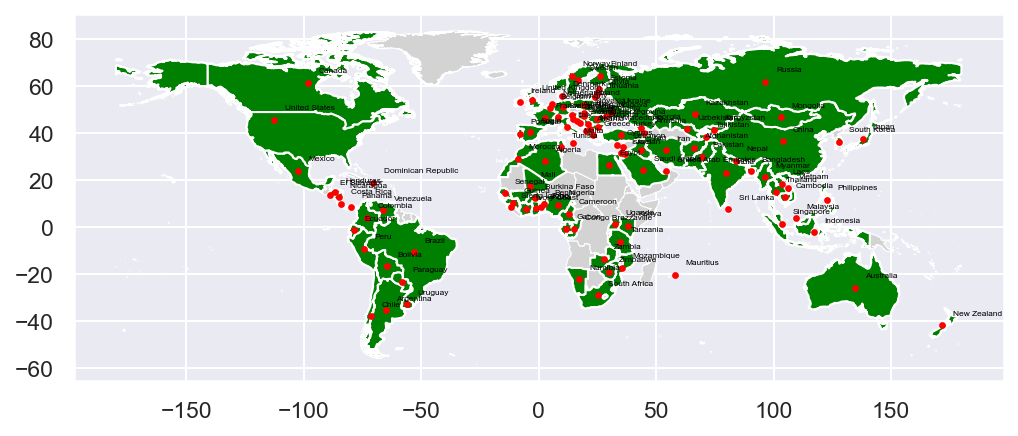

In [29]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

# Plot the base map in grey color
regions.plot(ax=ax,facecolor='lightgrey', edgecolor='white', linewidth=0.5)

# Plot the merged_first map on top of the base map
merged_first.plot(ax=plt.gca(), column='Country', color='green', edgecolor='white')
# merged_first.plot(ax=plt.gca(), column='COUNTRY', cmap='Blues', edgecolor='white', legend=True, legend_kwds={'label': 'globalregion_category'})


# add markers
for idx, row in merged_first.iterrows():
    plt.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=5, color='red')
    plt.annotate(row['Country'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black')

# show the plot
plt.show()

# Step 2. Plot the 3 main risks on a global map

## Step 2.1. Transport risks, experience and resilience

### 2.1.1 Transport perception map

In [30]:
participants = df.dropna(subset=['Q2_1'])
participants = df.groupby('Country').size().reset_index(name = 'Frequency_country')

merged_transport1 = merged[merged['Q2_1'].isin([1])]
merged_transport1 = merged_transport1.groupby('Country').size().reset_index(name = 'Frequency_risks')

merged_transport1 = pd.merge(merged_transport1, participants, on='Country')
#risk percentage
merged_transport1['Average_risks_percent'] = (merged_transport1['Frequency_risks'] / merged_transport1['Frequency_country']) * 100
# merge with the geomatrical data
merged_transport1 = merged_first.merge(merged_transport1, left_on='Country', right_on='Country')

/var/folders/c9/h5rgb9zs5p5d8dqmbtbjjq_h0000gr/T/ipykernel_8683/2265349828.py:37: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



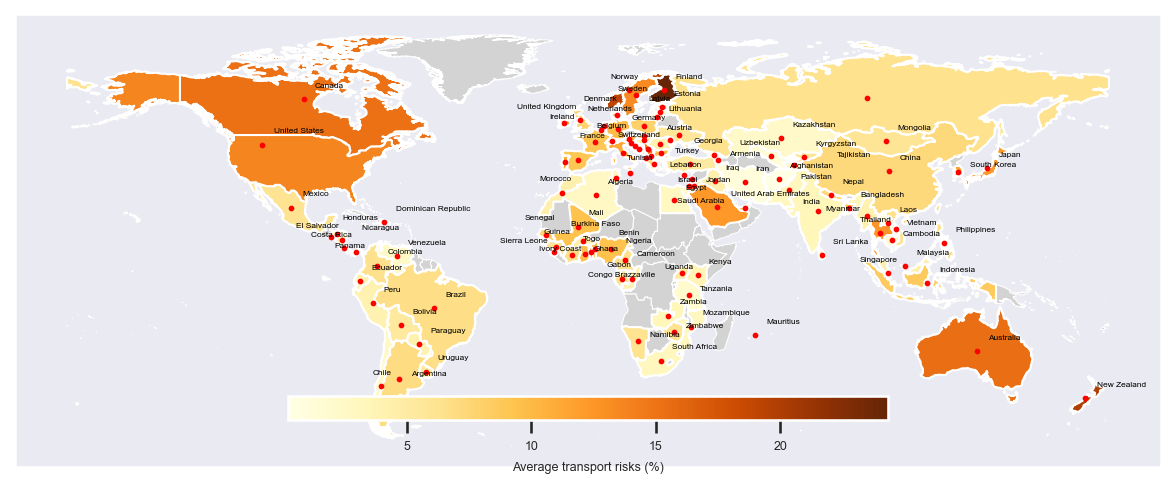

In [31]:
import matplotlib as mpl
cmap = mpl.cm.YlOrBr

# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

# Plot the base map in grey color
regions.plot(ax=ax, facecolor='lightgrey', edgecolor='white', linewidth=0.5)

# Remove grids
ax.grid(False)

# Risk frequency
risk_plot = merged_transport1.plot(ax=ax, column='Average_risks_percent', cmap=cmap, legend=False)

# Create a colorbar within the main graph and make it horizontal
norm = plt.Normalize(merged_transport1['Average_risks_percent'].min(), merged_transport1['Average_risks_percent'].max())
cbar_ax = fig.add_axes([0.25, 0.35, 0.5, 0.02])  # Adjust the position and size of the colorbar
cbar = mcb.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.ax.set_xlabel('Average transport risks (%)',fontsize = 6)
cbar.ax.tick_params(labelsize=6)

# Add markers and store annotations in a list
texts = []
for idx, row in merged_first.iterrows():
    ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=3, color='red')
    if (row['globalregion_category'] != 'Eastern Europe') &  (row['globalregion_category'] != 'Southern Europe') :
    
        texts.append(ax.annotate(row['Country'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black'))

# Optimize annotation positions to minimize overlaps
adjust_text(texts, ax=ax)

# Hide the x-axis and y-axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.savefig('./Figures/transport_map.pdf')
# Show the plo
plt.show()


### 2.1.2. Visualise the ranked map of transport experience
To calculate the experience score, the weitages are  Both = 1, Yes,personally experienced = 0.75, Yes,know someone who has experienced = 0.5, No = 0, and DK & refused = missing 

In [32]:
# Experience traffic issues
df_traffic= df[~df['Q5E'].isin([98, 99])].copy()

df_traffic['Q5E'].replace({3: 1, 1: 0.75, 2: 0.5, 4: 0}, inplace=True)

x= df_traffic.groupby('Country').mean()['Q5E']
# merge with the geomatrical data
merged_transport_experience = merged_first.merge(x, left_on='Country', right_on='Country')
merged_transport_experience.head()

Country                                           geometry  \
0  Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
1      Albania  POLYGON ((19.57083 41.68527, 19.58195 41.69569...   
2      Algeria  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...   
3    Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...   
4      Armenia  MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...   

       globalregion_category       Q5E  
0                 South Asia  0.327856  
1            Southern Europe  0.102307  
2               North Africa  0.311801  
3  Latin America & Caribbean  0.210000  
4               Central Asia  0.166835

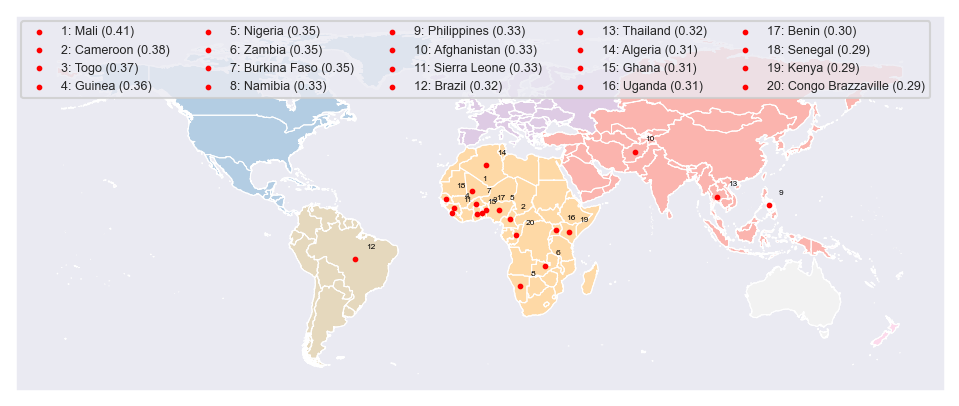

In [33]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

lands.plot(ax=ax, cmap='Pastel1', edgecolor='white', linewidth=0.5)
# Plot the base map in grey color
regions.plot(ax=ax,facecolor='none', edgecolor='white', linewidth=0.5)

# Plot the merged_first map on top of the base map
#merged_transport1.plot(ax=plt.gca(), column='Average_risks_percent', cmap='RdYlBu', edgecolor='white')
merged_transport_experience['Experience_formated'] = merged_transport_experience['Q5E'].apply(lambda x: "{:.2f}".format(x))
merged_transport_experience.loc[:,'Rank'] = merged_transport_experience['Q5E'].rank(ascending=False)
df_transport_ranked = merged_transport_experience[merged_transport_experience['Rank']<21].copy()

# add markers
for idx, row in df_transport_ranked.iterrows():
    plt.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=3, color='red')
    plt.annotate(f"{int(row['Rank'])}", xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black')
    
# Create a list of strings for the legend
df_transport_ranked = df_transport_ranked.sort_values(by='Rank')
legend_labels = [f'{int(row["Rank"])}: {row["Country"]} ({row["Experience_formated"]})' for _, row in df_transport_ranked.iterrows()]
plt.legend(legend_labels, loc='upper left', fontsize=6,ncol=5)

# Hide the x-axis and y-axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('./Figures/transport_experience_rank_map.pdf')
# show the plot
plt.show();

### Step 2.1.3: Visualise the resilience of people with transport risks


## Step 2.2: Visualise a heat map of crime risks

In [34]:
merged_crime = merged[merged['Q2_1'].isin([3])]

merged_crime = merged_crime.groupby(['Country', 'risk_category']).size().reset_index(name='Frequency_risks')

merged_crime = pd.merge(merged_crime, participants, on='Country')
#risk percentage
merged_crime['Average_risks_percent'] = (merged_crime['Frequency_risks'] / merged_crime['Frequency_country']) * 100
# merge with the geomatrical data
merged_crime = merged_first.merge(merged_crime, left_on='Country', right_on='Country')
#merged_crime

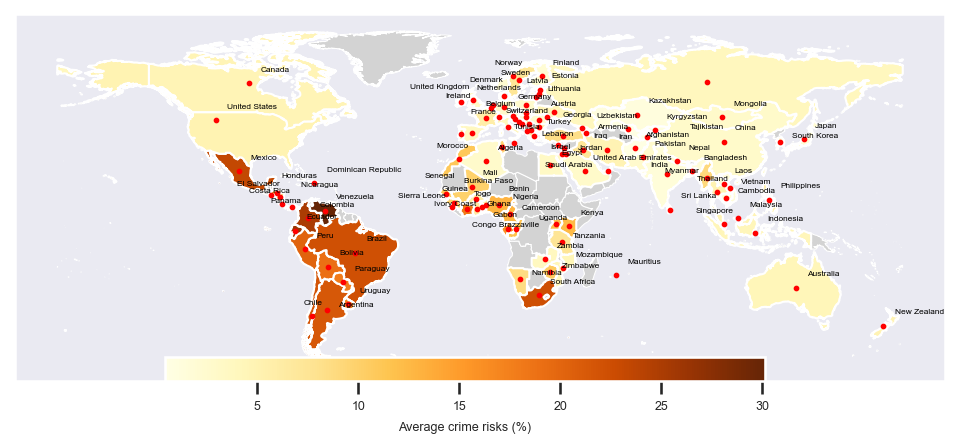

In [35]:
cmap = mpl.cm.YlOrBr
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

# Plot the base map in grey color
regions.plot(ax=ax, facecolor='lightgrey', edgecolor='white', linewidth=0.5)

# Remove grids
ax.grid(False)

# Risk frequency
risk_plot = merged_crime.plot(ax=ax, column='Average_risks_percent', cmap=cmap, legend=False)

# Create a colorbar within the main graph and make it horizontal
norm = plt.Normalize(merged_crime['Average_risks_percent'].min(), merged_crime['Average_risks_percent'].max())
cbar_ax = fig.add_axes([0.25, 0.35, 0.5, 0.02])  # Adjust the position and size of the colorbar
cbar = mcb.ColorbarBase(cbar_ax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.ax.set_xlabel('Average crime risks (%)',fontsize = 6)
cbar.ax.tick_params(labelsize=6)

# Add markers and store annotations in a list
texts = []
for idx, row in merged_first.iterrows():
    ax.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=3, color='red')
    if (row['globalregion_category'] != 'Eastern Europe') &  (row['globalregion_category'] != 'Southern Europe') :
        texts.append(ax.annotate(row['Country'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black'))

# Optimize annotation positions to minimize overlaps
adjust_text(texts, ax=ax)

# Hide the x-axis and y-axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
#plt.tight_layout()
plt.savefig('./Figures/crime_map.pdf')
# Show the plot
plt.show()


### 2.2.2. Visualise the ranked map of crime experience
To calculate the experience score, the weitages are  Both = 1, Yes,personally experienced = 0.75, Yes,know someone who has experienced = 0.5, No = 0, and DK & refused = missing 

In [36]:
# Experience traffic issues
df_crime= df[~df['Q5C'].isin([98, 99])].copy()

df_crime['Q5C'].replace({3: 1, 1: 0.75, 2: 0.5, 4: 0}, inplace=True)

x= df_crime.groupby('Country').mean()['Q5C']
# merge with the geomatrical data
merged_crime_experience = merged_first.merge(x, left_on='Country', right_on='Country')
merged_crime_experience.head()

Country                                           geometry  \
0  Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...   
1      Albania  POLYGON ((19.57083 41.68527, 19.58195 41.69569...   
2      Algeria  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...   
3    Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...   
4      Armenia  MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...   

       globalregion_category       Q5C  
0                 South Asia  0.404040  
1            Southern Europe  0.042462  
2               North Africa  0.184130  
3  Latin America & Caribbean  0.133884  
4               Central Asia  0.029175

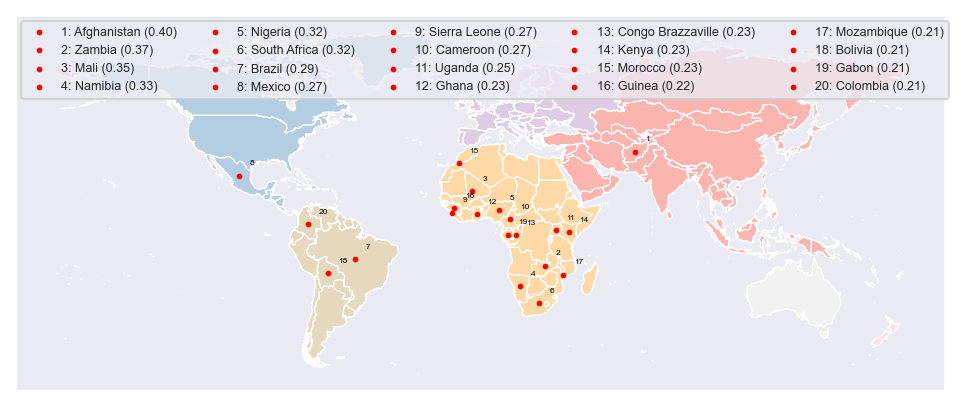

In [37]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

lands.plot(ax=ax, cmap='Pastel1', edgecolor='white', linewidth=0.5)
# Plot the base map in grey color
regions.plot(ax=ax,facecolor='none', edgecolor='white', linewidth=0.5)

# Plot the merged_first map on top of the base map
merged_crime_experience['Experience_formated'] = merged_crime_experience['Q5C'].apply(lambda x: "{:.2f}".format(x))
merged_crime_experience.loc[:,'Rank'] = merged_crime_experience['Q5C'].rank(ascending=False)
df_crime_ranked = merged_crime_experience[merged_crime_experience['Rank']<21].copy()

# add markers
for idx, row in df_crime_ranked.iterrows():
    plt.scatter(row.geometry.centroid.x, row.geometry.centroid.y, s=3, color='red')
    plt.annotate(f"{int(row['Rank'])}", xy=(row.geometry.centroid.x, row.geometry.centroid.y), xytext=(5, 5), textcoords='offset points', fontsize=4, color='black')
    
# Create a list of strings for the legend
df_crime_ranked = df_crime_ranked.sort_values(by='Rank')
legend_labels = [f'{int(row["Rank"])}: {row["Country"]} ({row["Experience_formated"]})' for _, row in df_crime_ranked.iterrows()]
plt.legend(legend_labels,  loc='upper left', fontsize=6,ncol=5)

# Hide the x-axis and y-axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('./Figures/crime_experience_rank_map.pdf')
# show the plot
plt.show();

# Step 3: Make risk-related indexes

## Step 3.1 Selecting most worried risks by people

In [38]:
# worrylevel_traffic_mean
df_new_1= df[~df['Q4E'].isin([98, 99])]
expected_perception_traffic = np.mean(df_new_1['Q4E'])
# worrylevel_traffic_SD
std_perception_traffic = np.std(df_new_1['Q4E'])
# worrylevel_crime_mean
df_new_2= df[~df['Q4C'].isin([98, 99])]
expected_perception_crime = np.mean(df_new_2['Q4C'])
# # worrylevel_crime_SD
std_perception_crime = np.std(df_new_2['Q4C'])
# worrylevel_food_mean
df_new_3= df[~df['Q4A'].isin([98, 99])]
expected_perception_food = np.mean(df_new_3['Q4A'])
# # worrylevel_food_SD
std_perception_food = np.std(df_new_3['Q4A'])
# worrylevel_water_mean
df_new_4= df[~df['Q4B'].isin([98, 99])]
expected_perception_water = np.mean(df_new_4['Q4B'])
# # worrylevel_water_SD
std_perception_water = np.std(df_new_4['Q4B'])
# worrylevel_weather_mean
df_new_5= df[~df['Q4D'].isin([98, 99])]
expected_perception_weather = np.mean(df_new_5['Q4D'])
# # worrylevel_weather_SD
std_perception_weather = np.std(df_new_5['Q4D'])
# worrylevel_mental_health_mean
df_new_6= df[~df['Q4F'].isin([98, 99])]
expected_perception_health = np.mean(df_new_6['Q4F'])
# # worrylevel_mental_health_SD
std_perception_health = np.std(df_new_6['Q4F'])
# worrylevel_work_you_do_mean
df_new_7= df[~df['Q4G'].isin([98, 99])]
expected_perception_work = np.mean(df_new_7['Q4G'])
# # worrylevel_work_you_do_SD
std_perception_work = np.std(df_new_7['Q4G'])

In [39]:
mean = pd.Series([1.8510530749789385, 1.9285030299043149, 2.182904564315353, 2.3037420023835327, 1.9133533574301278, 2.256654954631144, 2.3610715228292425])
sd= pd.Series([0.7829518465178122, 0.82915454740197, 0.7773544875867079, 0.7903374432342158, 0.8041756714545396, 0.8066594199051904, 0.7573198790556099])
df_mean_sd = pd.concat ([mean,sd], axis=1)
df_mean_sd.columns = ['Mean','SD']
df_mean_sd.index = ['Traffic','Crime','Food','Water', 'Environment 2', 'Health 4', 'Work']
df_mean_sd.index.name = 'Risks'
df_mean_sd

Mean        SD
Risks                            
Traffic        1.851053  0.782952
Crime          1.928503  0.829155
Food           2.182905  0.777354
Water          2.303742  0.790337
Environment 2  1.913353  0.804176
Health 4       2.256655  0.806659
Work           2.361072  0.757320

1: very worried, 2: somewhat worried, 3: Not worried //////
Based on people worryness on risks top three risks are traffic, crime and weather

$$\text{Perception Index (given country)} = \text{avg perception scores of a country}$$
$$\text{Risk Impact Index (given country)} = \text{avg experience score} \times \text{avg perception score}$$
$$\text{experience/perception score (for a individual)} = \frac{\text{experience/perception score}\times \text{weightage} \text{ (for crime, traffic, and weather)}} {\text{3}}$$


$$\text{Resilience Index (given country)} = \text{Average of ALL the Risk Impact Index} \times \text{Readyness score}$$

To calculate the perception score, the weitages are  very worried = 1, somewhat worried = 0.5, not worried = 0, and DK & refused = missing 
To calculate the experience score, the weitages are  Both = 1, Yes,personally experienced = 0.75, Yes,know someone who has experienced = 0.5, No = 0, and DK & refused = missing 
Domains cosidered for perception and experience score are crime, traffic, and weather

Readyness Score = Q20

In [40]:
worry=df.loc[:, ['GlobalRegion','Country', 'Q4C', 'Q4D','Q4E','Q5C', 'Q5D','Q5E','Q20']]
worry

GlobalRegion        Country  Q4C  Q4D  Q4E  Q5C  Q5D  Q5E  Q20
0                  6  United States  1.0  1.0  2.0  4.0  4.0  4.0  1.0
1                  6  United States  2.0  3.0  3.0  4.0  4.0  4.0  1.0
2                  6  United States  1.0  2.0  1.0  4.0  4.0  4.0  1.0
3                  6  United States  3.0  2.0  3.0  4.0  4.0  2.0  1.0
4                  6  United States  2.0  3.0  2.0  4.0  4.0  2.0  1.0
...              ...            ...  ...  ...  ...  ...  ...  ...  ...
280101             5         Brazil  1.0  1.0  NaN  NaN  NaN  NaN  NaN
280102            14         Serbia  1.0  3.0  NaN  NaN  NaN  NaN  NaN
280103            12       Slovakia  2.0  2.0  NaN  NaN  NaN  NaN  NaN
280104            10          India  2.0  1.0  NaN  NaN  NaN  NaN  NaN
280105            12         Poland  2.0  1.0  NaN  NaN  NaN  NaN  NaN

[253170 rows x 9 columns]

In [41]:
worry = worry.rename(columns={'Q4C': 'crime_worry', 'Q4D': 'weather_worry', 'Q4E': 'traffic_worry','Q5C': 'crime_experience', 'Q5D': 'weather_experience', 'Q5E': 'traffic_experience', 'Q20': 'resilience_in_future_disaster'})
worry

GlobalRegion        Country  crime_worry  weather_worry  \
0                  6  United States          1.0            1.0   
1                  6  United States          2.0            3.0   
2                  6  United States          1.0            2.0   
3                  6  United States          3.0            2.0   
4                  6  United States          2.0            3.0   
...              ...            ...          ...            ...   
280101             5         Brazil          1.0            1.0   
280102            14         Serbia          1.0            3.0   
280103            12       Slovakia          2.0            2.0   
280104            10          India          2.0            1.0   
280105            12         Poland          2.0            1.0   

        traffic_worry  crime_experience  weather_experience  \
0                 2.0               4.0                 4.0   
1                 3.0               4.0                 4.0   
2                 1.0               4.0                 4.0   
3                 3.0               4.0                 4.0   
4                 2.0               4.0                 4.0   
...               ...               ...                 ...   
280101            NaN               NaN                 NaN   
280102            NaN               NaN                 NaN   
280103            NaN               NaN                 NaN   
280104            NaN               NaN                 NaN   
280105            NaN               NaN                 NaN   

        traffic_experience  resilience_in_future_disaster  
0                      4.0                            1.0  
1                      4.0                            1.0  
2                      4.0                            1.0  
3                      2.0                            1.0  
4                      2.0                            1.0  
...                    ...                            ...  
280101                 NaN                            NaN  
280102                 NaN                            NaN  
280103                 NaN                            NaN  
280104                 NaN                            NaN  
280105                 NaN                            NaN  

[253170 rows x 9 columns]

In [42]:
# select the rows where all three columns have the value 98, 99
rows1 = (worry.loc[:, ['crime_worry', 'weather_worry', 'traffic_worry','crime_experience', 'weather_experience', 'traffic_experience','resilience_in_future_disaster']] == 98).all(axis=1)
worry = worry.drop(worry.index[rows1])

rows2 = (worry.loc[:, ['crime_worry', 'weather_worry', 'traffic_worry','crime_experience', 'weather_experience', 'traffic_experience','resilience_in_future_disaster']] == 99).all(axis=1)
worry = worry.drop(worry.index[rows2])

# print the selected rows
worry

GlobalRegion        Country  crime_worry  weather_worry  \
0                  6  United States          1.0            1.0   
1                  6  United States          2.0            3.0   
2                  6  United States          1.0            2.0   
3                  6  United States          3.0            2.0   
4                  6  United States          2.0            3.0   
...              ...            ...          ...            ...   
280101             5         Brazil          1.0            1.0   
280102            14         Serbia          1.0            3.0   
280103            12       Slovakia          2.0            2.0   
280104            10          India          2.0            1.0   
280105            12         Poland          2.0            1.0   

        traffic_worry  crime_experience  weather_experience  \
0                 2.0               4.0                 4.0   
1                 3.0               4.0                 4.0   
2                 1.0               4.0                 4.0   
3                 3.0               4.0                 4.0   
4                 2.0               4.0                 4.0   
...               ...               ...                 ...   
280101            NaN               NaN                 NaN   
280102            NaN               NaN                 NaN   
280103            NaN               NaN                 NaN   
280104            NaN               NaN                 NaN   
280105            NaN               NaN                 NaN   

        traffic_experience  resilience_in_future_disaster  
0                      4.0                            1.0  
1                      4.0                            1.0  
2                      4.0                            1.0  
3                      2.0                            1.0  
4                      2.0                            1.0  
...                    ...                            ...  
280101                 NaN                            NaN  
280102                 NaN                            NaN  
280103                 NaN                            NaN  
280104                 NaN                            NaN  
280105                 NaN                            NaN  

[253153 rows x 9 columns]

In [43]:
# replace the values 2 with 0.5 and 3 with 0
worry.loc[:, ['crime_worry', 'weather_worry', 'traffic_worry']] = worry.loc[:, ['crime_worry', 'weather_worry', 'traffic_worry']].replace({2: 0.5, 3: 0})
worry.loc[:, ['crime_experience', 'weather_experience', 'traffic_experience']] = worry.loc[:, ['crime_experience', 'weather_experience', 'traffic_experience']].replace({3: 1, 1: 0.75, 2: 0.5, 4: 0})
worry.loc[:, ['resilience_in_future_disaster']] = worry.loc[:, ['resilience_in_future_disaster']].replace({3: 0.5, 2: 0})
worry

GlobalRegion        Country  crime_worry  weather_worry  \
0                  6  United States          1.0            1.0   
1                  6  United States          0.5            0.0   
2                  6  United States          1.0            0.5   
3                  6  United States          0.0            0.5   
4                  6  United States          0.5            0.0   
...              ...            ...          ...            ...   
280101             5         Brazil          1.0            1.0   
280102            14         Serbia          1.0            0.0   
280103            12       Slovakia          0.5            0.5   
280104            10          India          0.5            1.0   
280105            12         Poland          0.5            1.0   

        traffic_worry  crime_experience  weather_experience  \
0                 0.5               0.0                 0.0   
1                 0.0               0.0                 0.0   
2                 1.0               0.0                 0.0   
3                 0.0               0.0                 0.0   
4                 0.5               0.0                 0.0   
...               ...               ...                 ...   
280101            NaN               NaN                 NaN   
280102            NaN               NaN                 NaN   
280103            NaN               NaN                 NaN   
280104            NaN               NaN                 NaN   
280105            NaN               NaN                 NaN   

        traffic_experience  resilience_in_future_disaster  
0                      0.0                            1.0  
1                      0.0                            1.0  
2                      0.0                            1.0  
3                      0.5                            1.0  
4                      0.5                            1.0  
...                    ...                            ...  
280101                 NaN                            NaN  
280102                 NaN                            NaN  
280103                 NaN                            NaN  
280104                 NaN                            NaN  
280105                 NaN                            NaN  

[253153 rows x 9 columns]

In [44]:
# define a function to compute the average of the non-ignored values in each row for perception score (worry) and experience score)
def compute_average(row):
    ignored_values = [98, 99]
    valid_values = [value for value in row if value not in ignored_values and not np.isnan(value)]
    if len(valid_values) > 0:
        return np.mean(valid_values)
    else:
        return np.nan

# create a new column with the computed average
worry['perception score'] = worry.loc[:, ['crime_worry', 'weather_worry', 'traffic_worry']].apply(compute_average, axis=1)
worry['experience score'] = worry.loc[:, ['crime_experience', 'weather_experience', 'traffic_experience']].apply(compute_average, axis=1)
worry

GlobalRegion        Country  crime_worry  weather_worry  \
0                  6  United States          1.0            1.0   
1                  6  United States          0.5            0.0   
2                  6  United States          1.0            0.5   
3                  6  United States          0.0            0.5   
4                  6  United States          0.5            0.0   
...              ...            ...          ...            ...   
280101             5         Brazil          1.0            1.0   
280102            14         Serbia          1.0            0.0   
280103            12       Slovakia          0.5            0.5   
280104            10          India          0.5            1.0   
280105            12         Poland          0.5            1.0   

        traffic_worry  crime_experience  weather_experience  \
0                 0.5               0.0                 0.0   
1                 0.0               0.0                 0.0   
2                 1.0               0.0                 0.0   
3                 0.0               0.0                 0.0   
4                 0.5               0.0                 0.0   
...               ...               ...                 ...   
280101            NaN               NaN                 NaN   
280102            NaN               NaN                 NaN   
280103            NaN               NaN                 NaN   
280104            NaN               NaN                 NaN   
280105            NaN               NaN                 NaN   

        traffic_experience  resilience_in_future_disaster  perception score  \
0                      0.0                            1.0          0.833333   
1                      0.0                            1.0          0.166667   
2                      0.0                            1.0          0.833333   
3                      0.5                            1.0          0.166667   
4                      0.5                            1.0          0.333333   
...                    ...                            ...               ...   
280101                 NaN                            NaN          1.000000   
280102                 NaN                            NaN          0.500000   
280103                 NaN                            NaN          0.500000   
280104                 NaN                            NaN          0.750000   
280105                 NaN                            NaN          0.750000   

        experience score  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.166667  
4               0.166667  
...                  ...  
280101               NaN  
280102               NaN  
280103               NaN  
280104               NaN  
280105               NaN  

[253153 rows x 11 columns]

In [45]:
#removes raws with both the scores has missinf values
worry.dropna(subset=['perception score', 'experience score'], how='any', inplace=True)
worry

GlobalRegion        Country  crime_worry  weather_worry  \
0                  6  United States          1.0            1.0   
1                  6  United States          0.5            0.0   
2                  6  United States          1.0            0.5   
3                  6  United States          0.0            0.5   
4                  6  United States          0.5            0.0   
...              ...            ...          ...            ...   
125906            12         Kosovo          0.5            1.0   
125907            12         Kosovo         98.0            0.0   
125908            12         Kosovo          0.0            0.5   
125909            12         Kosovo          0.5            0.5   
125910            12         Kosovo          1.0            1.0   

        traffic_worry  crime_experience  weather_experience  \
0                 0.5               0.0                 0.0   
1                 0.0               0.0                 0.0   
2                 1.0               0.0                 0.0   
3                 0.0               0.0                 0.0   
4                 0.5               0.0                 0.0   
...               ...               ...                 ...   
125906            1.0               0.5                 0.0   
125907            0.0               0.0                 0.0   
125908            1.0               0.0                 0.0   
125909            0.5               0.0                 0.0   
125910            0.0               0.0                 0.0   

        traffic_experience  resilience_in_future_disaster  perception score  \
0                      0.0                            1.0          0.833333   
1                      0.0                            1.0          0.166667   
2                      0.0                            1.0          0.833333   
3                      0.5                            1.0          0.166667   
4                      0.5                            1.0          0.333333   
...                    ...                            ...               ...   
125906                 0.0                            1.0          0.833333   
125907                 0.0                            1.0          0.000000   
125908                 0.0                            0.0          0.500000   
125909                 0.0                            0.0          0.500000   
125910                 0.0                            0.5          0.666667   

        experience score  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.166667  
4               0.166667  
...                  ...  
125906          0.166667  
125907          0.000000  
125908          0.000000  
125909          0.000000  
125910          0.000000  

[123449 rows x 11 columns]

In [46]:
cols_to_replace = ['crime_worry', 'weather_worry', 'traffic_worry','crime_experience', 'weather_experience', 'traffic_experience', 'resilience_in_future_disaster']
replace_dict = {98: np.nan, 99: np.nan}
worry[cols_to_replace] = worry[cols_to_replace].replace(replace_dict)
worry

GlobalRegion        Country  crime_worry  weather_worry  \
0                  6  United States          1.0            1.0   
1                  6  United States          0.5            0.0   
2                  6  United States          1.0            0.5   
3                  6  United States          0.0            0.5   
4                  6  United States          0.5            0.0   
...              ...            ...          ...            ...   
125906            12         Kosovo          0.5            1.0   
125907            12         Kosovo          NaN            0.0   
125908            12         Kosovo          0.0            0.5   
125909            12         Kosovo          0.5            0.5   
125910            12         Kosovo          1.0            1.0   

        traffic_worry  crime_experience  weather_experience  \
0                 0.5               0.0                 0.0   
1                 0.0               0.0                 0.0   
2                 1.0               0.0                 0.0   
3                 0.0               0.0                 0.0   
4                 0.5               0.0                 0.0   
...               ...               ...                 ...   
125906            1.0               0.5                 0.0   
125907            0.0               0.0                 0.0   
125908            1.0               0.0                 0.0   
125909            0.5               0.0                 0.0   
125910            0.0               0.0                 0.0   

        traffic_experience  resilience_in_future_disaster  perception score  \
0                      0.0                            1.0          0.833333   
1                      0.0                            1.0          0.166667   
2                      0.0                            1.0          0.833333   
3                      0.5                            1.0          0.166667   
4                      0.5                            1.0          0.333333   
...                    ...                            ...               ...   
125906                 0.0                            1.0          0.833333   
125907                 0.0                            1.0          0.000000   
125908                 0.0                            0.0          0.500000   
125909                 0.0                            0.0          0.500000   
125910                 0.0                            0.5          0.666667   

        experience score  
0               0.000000  
1               0.000000  
2               0.000000  
3               0.166667  
4               0.166667  
...                  ...  
125906          0.166667  
125907          0.000000  
125908          0.000000  
125909          0.000000  
125910          0.000000  

[123449 rows x 11 columns]

In [47]:
mean_scores = worry.groupby('Country').agg({'crime_worry': 'mean'}).reset_index()
# mean_scores = mean_scores.rename(columns={'perception score': 'Perception_Score_index', 'experience score': 'Experience_Score_index', 'resilience_in_future_disaster': 'Resilience_Score', 'crime_worry': 'Perception_Score_index_crime', 'weather_worry': 'Perception_Score_index_weather', 'traffic_worry': 'Perception_Score_index_traffic', 'crime_experience': 'experience_Score_index_crime', 'weather_experience': 'experience_Score_index_weather', 'traffic_experience': 'experience_Score_index_traffic'})
mean_scores

Country  crime_worry
0    Afghanistan     0.735533
1        Albania     0.385743
2        Algeria     0.636550
3      Argentina     0.610611
4        Armenia     0.236298
..           ...          ...
113   Uzbekistan     0.169534
114    Venezuela     0.711924
115      Vietnam     0.439182
116       Zambia     0.606957
117     Zimbabwe     0.654196

[118 rows x 2 columns]

In [48]:
mean_scores = worry.groupby('Country').agg({'perception score': 'mean', 'experience score': 'mean', 'crime_worry': 'mean', 'weather_worry': 'mean', 'traffic_worry': 'mean', 'crime_experience': 'mean', 'weather_experience': 'mean', 'traffic_experience': 'mean', 'resilience_in_future_disaster': 'mean'}).reset_index()
mean_scores = mean_scores.rename(columns={'perception score': 'Perception_Score_index', 'experience score': 'Experience_Score_index', 'resilience_in_future_disaster': 'Resilience_Score', 'crime_worry': 'Perception_Score_index_crime', 'weather_worry': 'Perception_Score_index_weather', 'traffic_worry': 'Perception_Score_index_traffic', 'crime_experience': 'experience_Score_index_crime', 'weather_experience': 'experience_Score_index_weather', 'traffic_experience': 'experience_Score_index_traffic'})
mean_scores

Country  Perception_Score_index  Experience_Score_index  \
0    Afghanistan                0.585341                0.363914   
1        Albania                0.483150                0.077494   
2        Algeria                0.542172                0.206103   
3      Argentina                0.580503                0.190393   
4        Armenia                0.335250                0.086500   
..           ...                     ...                     ...   
113   Uzbekistan                0.287333                0.037875   
114    Venezuela                0.647083                0.197333   
115      Vietnam                0.505048                0.181231   
116       Zambia                0.608685                0.349607   
117     Zimbabwe                0.737000                0.204833   

     Perception_Score_index_crime  Perception_Score_index_weather  \
0                        0.735533                        0.548304   
1                        0.385743                        0.415075   
2                        0.636550                        0.476684   
3                        0.610611                        0.533033   
4                        0.236298                        0.357287   
..                            ...                             ...   
113                      0.169534                        0.308824   
114                      0.711924                        0.632000   
115                      0.439182                        0.483085   
116                      0.606957                        0.560937   
117                      0.654196                        0.777889   

     Perception_Score_index_traffic  experience_Score_index_crime  \
0                          0.473765                      0.403943   
1                          0.650505                      0.042462   
2                          0.517152                      0.184506   
3                          0.597793                      0.133884   
4                          0.405961                      0.029204   
..                              ...                           ...   
113                        0.384343                      0.020060   
114                        0.598000                      0.205750   
115                        0.590818                      0.102137   
116                        0.658137                      0.373089   
117                        0.778614                      0.185994   

     experience_Score_index_weather  experience_Score_index_traffic  \
0                          0.362193                        0.327682   
1                          0.088353                        0.102307   
2                          0.120380                        0.312436   
3                          0.226750                        0.210000   
4                          0.063192                        0.166498   
..                              ...                             ...   
113                        0.037287                        0.056281   
114                        0.239740                        0.146647   
115                        0.185388                        0.256207   
116                        0.328660                        0.347475   
117                        0.188000                        0.240000   

     Resilience_Score  
0            0.340481  
1            0.239796  
2            0.374560  
3            0.567368  
4            0.575292  
..                ...  
113          0.681667  
114          0.492394  
115          0.840081  
116          0.434183  
117          0.361446  

[118 rows x 10 columns]

In [49]:
# keep only the 'Country' and 'Global Region' columns from worry
worry_country_region = worry[['Country', 'GlobalRegion']]

# remove any duplicate rows for each country
worry_country_region = worry_country_region.drop_duplicates(subset='Country', keep='first')

# reset the index of the dataframe
worry_country_region = worry_country_region.reset_index(drop=True)
worry_country_region

Country  GlobalRegion
0           United States             6
1                   Egypt             3
2                 Morocco             3
3                 Lebanon            11
4            Saudi Arabia            11
..                    ...           ...
113               Tunisia             3
114  United Arab Emirates            11
115               Uruguay             5
116            Uzbekistan             7
117                Kosovo            12

[118 rows x 2 columns]

In [50]:
mean_scores = mean_scores.merge(worry_country_region, on='Country')
mean_scores

Country  Perception_Score_index  Experience_Score_index  \
0    Afghanistan                0.585341                0.363914   
1        Albania                0.483150                0.077494   
2        Algeria                0.542172                0.206103   
3      Argentina                0.580503                0.190393   
4        Armenia                0.335250                0.086500   
..           ...                     ...                     ...   
113   Uzbekistan                0.287333                0.037875   
114    Venezuela                0.647083                0.197333   
115      Vietnam                0.505048                0.181231   
116       Zambia                0.608685                0.349607   
117     Zimbabwe                0.737000                0.204833   

     Perception_Score_index_crime  Perception_Score_index_weather  \
0                        0.735533                        0.548304   
1                        0.385743                        0.415075   
2                        0.636550                        0.476684   
3                        0.610611                        0.533033   
4                        0.236298                        0.357287   
..                            ...                             ...   
113                      0.169534                        0.308824   
114                      0.711924                        0.632000   
115                      0.439182                        0.483085   
116                      0.606957                        0.560937   
117                      0.654196                        0.777889   

     Perception_Score_index_traffic  experience_Score_index_crime  \
0                          0.473765                      0.403943   
1                          0.650505                      0.042462   
2                          0.517152                      0.184506   
3                          0.597793                      0.133884   
4                          0.405961                      0.029204   
..                              ...                           ...   
113                        0.384343                      0.020060   
114                        0.598000                      0.205750   
115                        0.590818                      0.102137   
116                        0.658137                      0.373089   
117                        0.778614                      0.185994   

     experience_Score_index_weather  experience_Score_index_traffic  \
0                          0.362193                        0.327682   
1                          0.088353                        0.102307   
2                          0.120380                        0.312436   
3                          0.226750                        0.210000   
4                          0.063192                        0.166498   
..                              ...                             ...   
113                        0.037287                        0.056281   
114                        0.239740                        0.146647   
115                        0.185388                        0.256207   
116                        0.328660                        0.347475   
117                        0.188000                        0.240000   

     Resilience_Score  GlobalRegion  
0            0.340481            10  
1            0.239796            14  
2            0.374560             3  
3            0.567368             5  
4            0.575292             7  
..                ...           ...  
113          0.681667             7  
114          0.492394             5  
115          0.840081             9  
116          0.434183             1  
117          0.361446             1  

[118 rows x 11 columns]

In [51]:
mean_scores.isna().sum()

Country                           0
Perception_Score_index            0
Experience_Score_index            0
Perception_Score_index_crime      0
Perception_Score_index_weather    0
Perception_Score_index_traffic    0
experience_Score_index_crime      0
experience_Score_index_weather    0
experience_Score_index_traffic    0
Resilience_Score                  0
GlobalRegion                      0
dtype: int64

In [52]:
mean_scores['risk_impact_index'] = mean_scores['Perception_Score_index'] * mean_scores['Experience_Score_index']
mean_scores['risk_impact_index_crime'] = mean_scores['Perception_Score_index_crime'] * mean_scores['experience_Score_index_crime']
mean_scores['risk_impact_index_weather'] = mean_scores['Perception_Score_index_weather'] * mean_scores['experience_Score_index_weather']
mean_scores['risk_impact_index_traffic'] = mean_scores['Perception_Score_index_traffic'] * mean_scores['experience_Score_index_traffic']
mean_scores

Country  Perception_Score_index  Experience_Score_index  \
0    Afghanistan                0.585341                0.363914   
1        Albania                0.483150                0.077494   
2        Algeria                0.542172                0.206103   
3      Argentina                0.580503                0.190393   
4        Armenia                0.335250                0.086500   
..           ...                     ...                     ...   
113   Uzbekistan                0.287333                0.037875   
114    Venezuela                0.647083                0.197333   
115      Vietnam                0.505048                0.181231   
116       Zambia                0.608685                0.349607   
117     Zimbabwe                0.737000                0.204833   

     Perception_Score_index_crime  Perception_Score_index_weather  \
0                        0.735533                        0.548304   
1                        0.385743                        0.415075   
2                        0.636550                        0.476684   
3                        0.610611                        0.533033   
4                        0.236298                        0.357287   
..                            ...                             ...   
113                      0.169534                        0.308824   
114                      0.711924                        0.632000   
115                      0.439182                        0.483085   
116                      0.606957                        0.560937   
117                      0.654196                        0.777889   

     Perception_Score_index_traffic  experience_Score_index_crime  \
0                          0.473765                      0.403943   
1                          0.650505                      0.042462   
2                          0.517152                      0.184506   
3                          0.597793                      0.133884   
4                          0.405961                      0.029204   
..                              ...                           ...   
113                        0.384343                      0.020060   
114                        0.598000                      0.205750   
115                        0.590818                      0.102137   
116                        0.658137                      0.373089   
117                        0.778614                      0.185994   

     experience_Score_index_weather  experience_Score_index_traffic  \
0                          0.362193                        0.327682   
1                          0.088353                        0.102307   
2                          0.120380                        0.312436   
3                          0.226750                        0.210000   
4                          0.063192                        0.166498   
..                              ...                             ...   
113                        0.037287                        0.056281   
114                        0.239740                        0.146647   
115                        0.185388                        0.256207   
116                        0.328660                        0.347475   
117                        0.188000                        0.240000   

     Resilience_Score  GlobalRegion  risk_impact_index  \
0            0.340481            10           0.213014   
1            0.239796            14           0.037441   
2            0.374560             3           0.111743   
3            0.567368             5           0.110524   
4            0.575292             7           0.028999   
..                ...           ...                ...   
113          0.681667             7           0.010883   
114          0.492394             5           0.127691   
115          0.840081             9           0.091531   
116          0.434183             1           0.212800   
117          0.361446             1        

In [53]:
mean_scores['resilience_index'] = mean_scores['Resilience_Score'] * mean_scores['risk_impact_index']
mean_scores

Country  Perception_Score_index  Experience_Score_index  \
0    Afghanistan                0.585341                0.363914   
1        Albania                0.483150                0.077494   
2        Algeria                0.542172                0.206103   
3      Argentina                0.580503                0.190393   
4        Armenia                0.335250                0.086500   
..           ...                     ...                     ...   
113   Uzbekistan                0.287333                0.037875   
114    Venezuela                0.647083                0.197333   
115      Vietnam                0.505048                0.181231   
116       Zambia                0.608685                0.349607   
117     Zimbabwe                0.737000                0.204833   

     Perception_Score_index_crime  Perception_Score_index_weather  \
0                        0.735533                        0.548304   
1                        0.385743                        0.415075   
2                        0.636550                        0.476684   
3                        0.610611                        0.533033   
4                        0.236298                        0.357287   
..                            ...                             ...   
113                      0.169534                        0.308824   
114                      0.711924                        0.632000   
115                      0.439182                        0.483085   
116                      0.606957                        0.560937   
117                      0.654196                        0.777889   

     Perception_Score_index_traffic  experience_Score_index_crime  \
0                          0.473765                      0.403943   
1                          0.650505                      0.042462   
2                          0.517152                      0.184506   
3                          0.597793                      0.133884   
4                          0.405961                      0.029204   
..                              ...                           ...   
113                        0.384343                      0.020060   
114                        0.598000                      0.205750   
115                        0.590818                      0.102137   
116                        0.658137                      0.373089   
117                        0.778614                      0.185994   

     experience_Score_index_weather  experience_Score_index_traffic  \
0                          0.362193                        0.327682   
1                          0.088353                        0.102307   
2                          0.120380                        0.312436   
3                          0.226750                        0.210000   
4                          0.063192                        0.166498   
..                              ...                             ...   
113                        0.037287                        0.056281   
114                        0.239740                        0.146647   
115                        0.185388                        0.256207   
116                        0.328660                        0.347475   
117                        0.188000                        0.240000   

     Resilience_Score  GlobalRegion  risk_impact_index  \
0            0.340481            10           0.213014   
1            0.239796            14           0.037441   
2            0.374560             3           0.111743   
3            0.567368             5           0.110524   
4            0.575292             7           0.028999   
..                ...           ...                ...   
113          0.681667             7           0.010883   
114          0.492394             5           0.127691   
115          0.840081             9           0.091531   
116          0.434183             1           0.212800   
117          0.361446             1        

In [54]:
# Define a dictionary to map the numbers to the region names
region_map = {
    1: 'Eastern Africa',
    2: 'Central/Western Africa',
    3: 'North Africa',
    4: 'Southern Africa',
    5: 'Latin America & Caribbean',
    6: 'Northern America',
    7: 'Central Asia',
    8: 'East Asia',
    9: 'South-eastern Asia',
    10: 'South Asia',
    11: 'Middle East',
    12: 'Eastern Europe',
    13: 'Northern/Western Europe',
    14: 'Southern Europe',
    15: 'Australia and New Zealand'
}

# Use the replace method to replace the numbers with the region names
mean_scores['GlobalRegion'] = mean_scores['GlobalRegion'].replace(region_map)

# Display the updated dataframe
mean_scores

Country  Perception_Score_index  Experience_Score_index  \
0    Afghanistan                0.585341                0.363914   
1        Albania                0.483150                0.077494   
2        Algeria                0.542172                0.206103   
3      Argentina                0.580503                0.190393   
4        Armenia                0.335250                0.086500   
..           ...                     ...                     ...   
113   Uzbekistan                0.287333                0.037875   
114    Venezuela                0.647083                0.197333   
115      Vietnam                0.505048                0.181231   
116       Zambia                0.608685                0.349607   
117     Zimbabwe                0.737000                0.204833   

     Perception_Score_index_crime  Perception_Score_index_weather  \
0                        0.735533                        0.548304   
1                        0.385743                        0.415075   
2                        0.636550                        0.476684   
3                        0.610611                        0.533033   
4                        0.236298                        0.357287   
..                            ...                             ...   
113                      0.169534                        0.308824   
114                      0.711924                        0.632000   
115                      0.439182                        0.483085   
116                      0.606957                        0.560937   
117                      0.654196                        0.777889   

     Perception_Score_index_traffic  experience_Score_index_crime  \
0                          0.473765                      0.403943   
1                          0.650505                      0.042462   
2                          0.517152                      0.184506   
3                          0.597793                      0.133884   
4                          0.405961                      0.029204   
..                              ...                           ...   
113                        0.384343                      0.020060   
114                        0.598000                      0.205750   
115                        0.590818                      0.102137   
116                        0.658137                      0.373089   
117                        0.778614                      0.185994   

     experience_Score_index_weather  experience_Score_index_traffic  \
0                          0.362193                        0.327682   
1                          0.088353                        0.102307   
2                          0.120380                        0.312436   
3                          0.226750                        0.210000   
4                          0.063192                        0.166498   
..                              ...                             ...   
113                        0.037287                        0.056281   
114                        0.239740                        0.146647   
115                        0.185388                        0.256207   
116                        0.328660                        0.347475   
117                        0.188000                        0.240000   

     Resilience_Score               GlobalRegion  risk_impact_index  \
0            0.340481                 South Asia           0.213014   
1            0.239796            Southern Europe           0.037441   
2            0.374560               North Africa           0.111743   
3            0.567368  Latin America & Caribbean           0.110524   
4            0.575292               Central Asia           0.028999   
..                ...                        ...                ...   
113          0.681667               Central Asia           0.010883   
114          0.492394  Latin America & Caribbean           0.127691   
115          0.840081         South-easter

From here it begins the comparison with traffic statistical data

In [56]:
df_traffic = pd.read_csv("shapefiles/traffic.csv")
df_traffic

Country  Year Estimated number of road traffic deaths  \
0     Afghanistan  2019                        6033 [5227-6846]   
1     Afghanistan  2018                        5295 [4578-6017]   
2     Afghanistan  2017                        5490 [4737-6246]   
3     Afghanistan  2016                        5240 [4512-5970]   
4     Afghanistan  2015                        4942 [4248-5637]   
...           ...   ...                                     ...   
3655     Zimbabwe  2004                        4188 [3423-4953]   
3656     Zimbabwe  2003                        4044 [3316-4772]   
3657     Zimbabwe  2002                        3869 [3190-4548]   
3658     Zimbabwe  2001                        3541 [2942-4141]   
3659     Zimbabwe  2000                        3483 [2894-4072]   

     Estimated road traffic death rate (per 100 000 population)  
0                                      15.9 [13.7-18.0]          
1                                      14.2 [12.3-16.2]          
2                                      15.1 [13.1-17.2]          
3                                      14.8 [12.8-16.9]          
4                                      14.4 [12.3-16.4]          
...                                                 ...          
3655                                   34.8 [28.5-41.2]          
3656                                   33.7 [27.7-39.8]          
3657                                   32.4 [26.7-38.0]          
3658                                   29.7 [24.7-34.7]          
3659                                   29.3 [24.4-34.3]          

[3660 rows x 4 columns]

In [57]:
# remove the part in brackets and convert the remaining string to integer
df_traffic['Estimated number of road traffic deaths'] = df_traffic['Estimated number of road traffic deaths'].str.replace(r'\[.*\]', '').astype(int)
df_traffic['Estimated road traffic death rate (per 100 000 population)'] = df_traffic['Estimated road traffic death rate (per 100 000 population)'].str.replace(r'\[.*\]', '').astype(float)
df_traffic= df_traffic[df_traffic['Year'].isin([2019])]
df_traffic

/var/folders/c9/h5rgb9zs5p5d8dqmbtbjjq_h0000gr/T/ipykernel_8683/3952108074.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/c9/h5rgb9zs5p5d8dqmbtbjjq_h0000gr/T/ipykernel_8683/3952108074.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



Country  Year  \
0                            Afghanistan  2019   
20                               Albania  2019   
40                               Algeria  2019   
60                                Angola  2019   
80                   Antigua and Barbuda  2019   
...                                  ...   ...   
3560  Venezuela (Bolivarian Republic of)  2019   
3580                            Viet Nam  2019   
3600                               Yemen  2019   
3620                              Zambia  2019   
3640                            Zimbabwe  2019   

      Estimated number of road traffic deaths  \
0                                        6033   
20                                        337   
40                                       8996   
60                                       8317   
80                                          0   
...                                       ...   
3560                                    11127   
3580                                    29475   
3600                                     8561   
3620                                     3654   
3640                                     6037   

      Estimated road traffic death rate (per 100 000 population)  
0                                                  15.9           
20                                                 11.7           
40                                                 20.9           
60                                                 26.1           
80                                                  0.0           
...                                                 ...           
3560                                               39.0           
3580                                               30.6           
3600                                               29.4           
3620                                               20.5           
3640                                               41.2           

[183 rows x 4 columns]

In [58]:
#rename the countries in statistical traffic data as Poll data survey
df_traffic['Country'] = df_traffic['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
df_traffic['Country'] = df_traffic['Country'].replace('Bosnia and Herzegovina', 'Bosnia Herzegovina')
df_traffic['Country'] = df_traffic['Country'].replace('Congo', 'Congo Brazzaville')
df_traffic['Country'] = df_traffic['Country'].replace('Czechia', 'Czech Republic')
df_traffic['Country'] = df_traffic['Country'].replace('Iran (Islamic Republic of)', 'Iran')
df_traffic['Country'] = df_traffic['Country'].replace("Côte d'Ivoire", 'Ivory Coast')
df_traffic['Country'] = df_traffic['Country'].replace("Lao People's Democratic Republic", 'Laos')
df_traffic['Country'] = df_traffic['Country'].replace('Republic of Moldova', 'Moldova')
df_traffic['Country'] = df_traffic['Country'].replace('Russian Federation', 'Russia')
df_traffic['Country'] = df_traffic['Country'].replace('Republic of Korea', 'South Korea')
df_traffic['Country'] = df_traffic['Country'].replace('United Republic of Tanzania', 'Tanzania')
df_traffic['Country'] = df_traffic['Country'].replace('Türkiye', 'Turkey')
df_traffic['Country'] = df_traffic['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df_traffic['Country'] = df_traffic['Country'].replace('United States of America', 'United States')
df_traffic['Country'] = df_traffic['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
df_traffic['Country'] = df_traffic['Country'].replace('Viet Nam', 'Vietnam')

/var/folders/c9/h5rgb9zs5p5d8dqmbtbjjq_h0000gr/T/ipykernel_8683/2966576519.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/h5rgb9zs5p5d8dqmbtbjjq_h0000gr/T/ipykernel_8683/2966576519.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/h5rgb9zs5p5d8dqmbtbjjq_h0000gr/T/ipykernel_8683/2966576519.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [59]:
merged_new = df_traffic.merge(mean_scores, on='Country', how='inner')
merged_new

Country  Year  Estimated number of road traffic deaths  \
0    Afghanistan  2019                                     6033   
1        Albania  2019                                      337   
2        Algeria  2019                                     8996   
3      Argentina  2019                                     6298   
4        Armenia  2019                                      590   
..           ...   ...                                      ...   
110   Uzbekistan  2019                                     3853   
111    Venezuela  2019                                    11127   
112      Vietnam  2019                                    29475   
113       Zambia  2019                                     3654   
114     Zimbabwe  2019                                     6037   

     Estimated road traffic death rate (per 100 000 population)  \
0                                                 15.9            
1                                                 11.7            
2                                                 20.9            
3                                                 14.1            
4                                                 20.0            
..                                                 ...            
110                                               11.7            
111                                               39.0            
112                                               30.6            
113                                               20.5            
114                                               41.2            

     Perception_Score_index  Experience_Score_index  \
0                  0.585341                0.363914   
1                  0.483150                0.077494   
2                  0.542172                0.206103   
3                  0.580503                0.190393   
4                  0.335250                0.086500   
..                      ...                     ...   
110                0.287333                0.037875   
111                0.647083                0.197333   
112                0.505048                0.181231   
113                0.608685                0.349607   
114                0.737000                0.204833   

     Perception_Score_index_crime  Perception_Score_index_weather  \
0                        0.735533                        0.548304   
1                        0.385743                        0.415075   
2                        0.636550                        0.476684   
3                        0.610611                        0.533033   
4                        0.236298                        0.357287   
..                            ...                             ...   
110                      0.169534                        0.308824   
111                      0.711924                        0.632000   
112                      0.439182                        0.483085   
113                      0.606957                        0.560937   
114                      0.654196                        0.777889   

     Perception_Score_index_traffic  experience_Score_index_crime  \
0                          0.473765                      0.403943   
1                          0.650505                      0.042462   
2                          0.517152                      0.184506   
3                          0.597793                      0.133884   
4                          0.405961                      0.029204   
..                              ...                           ...   
110                        0.384343                      0.020060   
111                        0.598000                      0.205750   
112                        0.590818                      0.102137   
113                        0.658137                      0.373089   
114                        0.778614                      0.185994   

     experience_Score_index_weather  experience_Score_index_traffic  \
0        

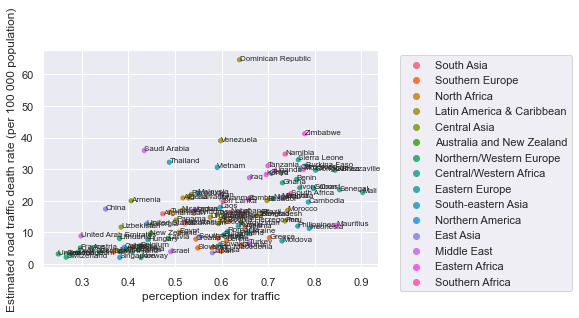

In [60]:
# Create a scatter plot
sns.scatterplot(data=merged_new, x='Perception_Score_index_traffic', y='Estimated road traffic death rate (per 100 000 population)', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['Perception_Score_index_traffic'], row['Estimated road traffic death rate (per 100 000 population)'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('perception index for traffic')
plt.ylabel('Estimated road traffic death rate (per 100 000 population)')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

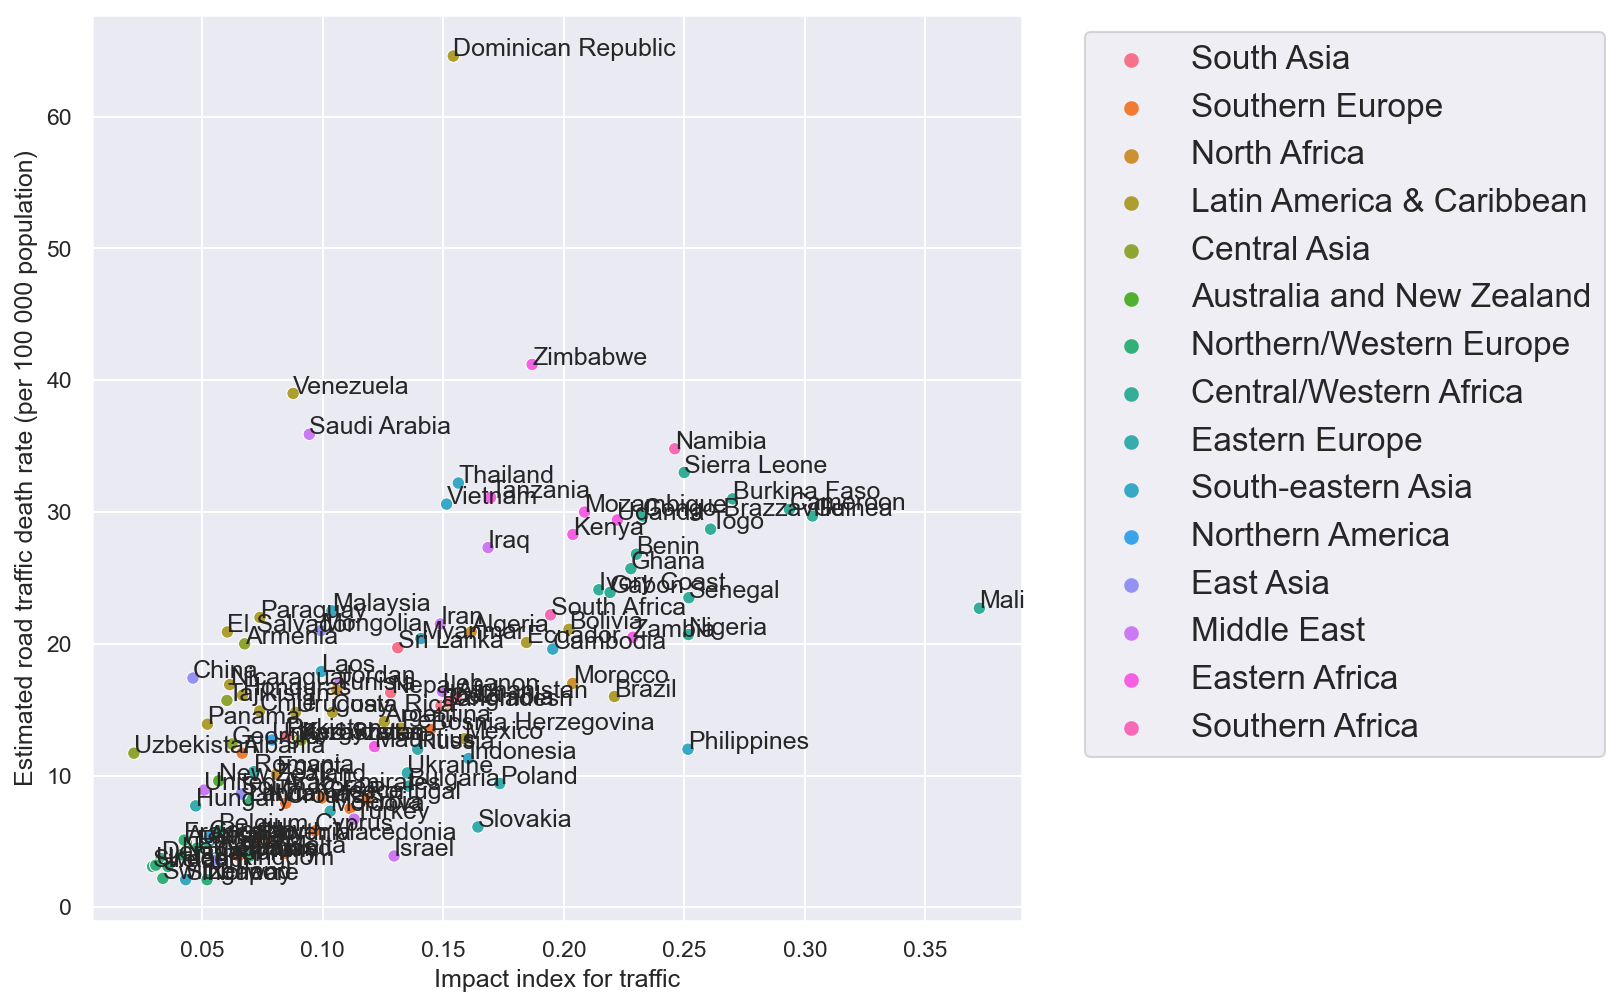

In [68]:
# Increase the text size in the whole figure
plt.rcParams.update({'font.size': 12})

# Create a scatter plot
plt.subplots(figsize=(8, 8), dpi=150)

sns.scatterplot(data=merged_new, x='risk_impact_index_traffic', y='Estimated road traffic death rate (per 100 000 population)', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['risk_impact_index_traffic'], row['Estimated road traffic death rate (per 100 000 population)'], row['Country'],  fontsize=12)

# Set x and y axis labels
plt.xlabel('Impact index for traffic')
plt.ylabel('Estimated road traffic death rate (per 100 000 population)')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=16)
fig.savefig('./Figures/Impact')
# Display the plot
plt.show()

From here it begins the comparison with crime statistical data

In [ ]:
df_crime = pd.read_csv("crime.csv")
df_crime = df_crime.rename(columns={'country': 'Country'}) 
df_crime

Country  crimeIndex
0               Venezuela       83.76
1        Papua New Guinea       80.79
2            South Africa       76.86
3             Afghanistan       76.31
4                Honduras       74.54
..                    ...         ...
131                  Oman       20.34
132           Isle Of Man       19.25
133                Taiwan       15.46
134  United Arab Emirates       15.23
135                 Qatar       12.13

[136 rows x 2 columns]

In [ ]:
merged_new = df_crime.merge(mean_scores, on='Country', how='inner')
merged_new

Country  crimeIndex  Perception_Score_index  \
0               Venezuela       83.76                0.647083   
1            South Africa       76.86                0.744205   
2             Afghanistan       76.31                0.585341   
3                Honduras       74.54                0.567000   
4             El Salvador       67.79                0.499402   
..                    ...         ...                     ...   
101                 Japan       22.19                0.565329   
102             Hong Kong       22.00                0.376494   
103           Switzerland       21.62                0.342667   
104                Taiwan       15.46                0.470333   
105  United Arab Emirates       15.23                0.207254   

     Experience_Score_index  Perception_Score_index_crime  \
0                  0.197333                      0.711924   
1                  0.246858                      0.838741   
2                  0.363914                      0.735533   
3                  0.163417                      0.563572   
4                  0.108607                      0.494664   
..                      ...                           ...   
101                0.082755                      0.449000   
102                0.068476                      0.406375   
103                0.142417                      0.313814   
104                0.068833                      0.374747   
105                0.078436                      0.158818   

     Perception_Score_index_weather  Perception_Score_index_traffic  \
0                          0.632000                        0.598000   
1                          0.646500                        0.748512   
2                          0.548304                        0.473765   
3                          0.596386                        0.540785   
4                          0.487408                        0.528632   
..                              ...                             ...   
101                        0.665510                        0.580437   
102                        0.335657                        0.387338   
103                        0.449850                        0.266266   
104                        0.500502                        0.537688   
105                        0.167167                        0.298096   

     experience_Score_index_crime  experience_Score_index_weather  \
0                        0.205750                        0.239740   
1                        0.315217                        0.164286   
2                        0.403943                        0.362193   
3                        0.114688                        0.253024   
4                        0.089248                        0.120610   
..                            ...                             ...   
101                      0.012636                        0.139247   
102                      0.060757                        0.063061   
103                      0.072750                        0.227750   
104                      0.036002                        0.034569   
105                      0.028664                        0.036391   

     experience_Score_index_traffic  Resilience_Score  \
0                          0.146647          0.492394   
1                          0.259833          0.342051   
2                          0.327682          0.340481   
3                          0.123364          0.585062   
4                          0.114293          0.628894   
..                              ...               ...   
101                        0.096383          0.701424   
102                        0.081755          0.537575   
103                        0.126376          0.699161   
104                        0.134519          0.712039   
105                        0.170239          0.594439   

                  GlobalRegion  risk_impact_index  risk_impact_index_crime  \
0    Latin America & Caribbean           0.127691          

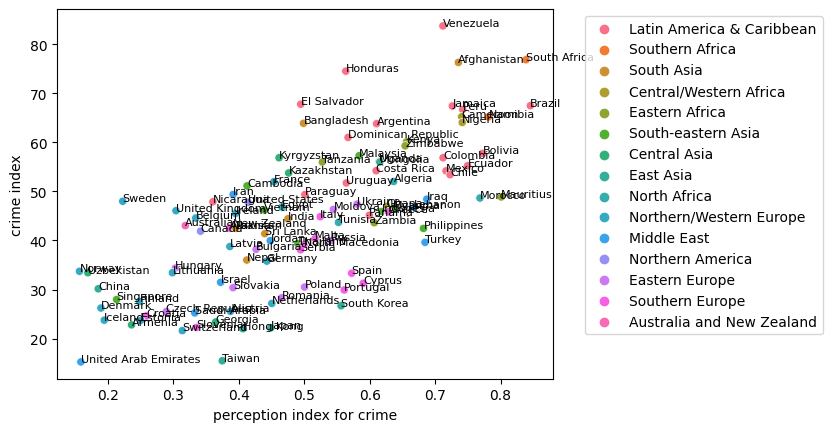

In [ ]:
# Create a scatter plot
sns.scatterplot(data=merged_new, x='Perception_Score_index_crime', y='crimeIndex', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['Perception_Score_index_crime'], row['crimeIndex'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('perception index for crime')
plt.ylabel('crime index')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

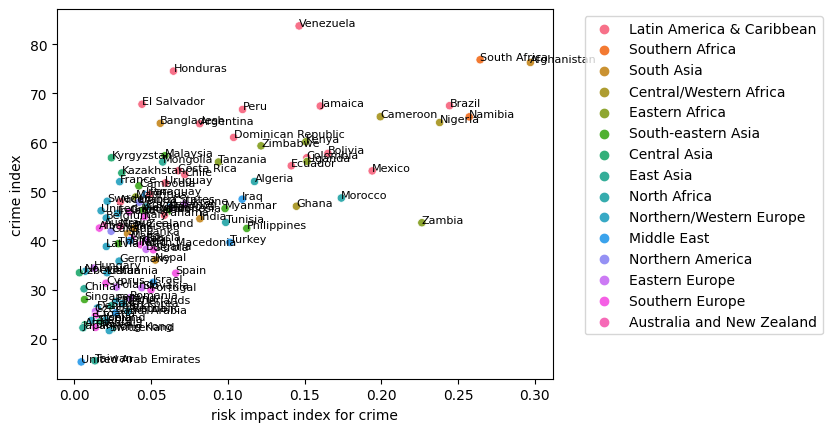

In [ ]:
# Create a scatter plot
sns.scatterplot(data=merged_new, x='risk_impact_index_crime', y='crimeIndex', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['risk_impact_index_crime'], row['crimeIndex'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('risk impact index for crime')
plt.ylabel('crime index')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

From here it begins the comparison with weather statistical data

In [ ]:
df_weather = pd.read_csv("disasters.csv")
df_weather = df_weather.rename(columns={'Country name': 'Country'}) 
df_weather

Country  Year  Death rates from disasters  \
0     Afghanistan  1900                    0.000000   
1     Afghanistan  1910                    0.000000   
2     Afghanistan  1920                    0.000000   
3     Afghanistan  1930                    0.000000   
4     Afghanistan  1940                    0.000000   
...           ...   ...                         ...   
3050     Zimbabwe  1980                    0.000000   
3051     Zimbabwe  1990                    0.031173   
3052     Zimbabwe  2000                    0.100029   
3053     Zimbabwe  2010                    0.726920   
3054     Zimbabwe  2020                    0.006253   

      Number of people affected by disasters per 100,000  
0                                               0.00000   
1                                               0.00000   
2                                               0.00000   
3                                               0.00000   
4                                               0.00000   
...                                                 ...   
3050                                            0.00000   
3051                                         4991.31800   
3052                                         6946.78030   
3053                                         9403.18750   
3054                                          360.22888   

[3055 rows x 4 columns]

In [ ]:
df_weather= df_weather[df_weather['Year'].isin([2020])]
df_weather

Country  Year  Death rates from disasters  \
12       Afghanistan  2020                    1.700606   
25            Africa  2020                    0.156916   
38           Albania  2020                    0.000000   
51           Algeria  2020                    0.110379   
64    American Samoa  2020                    0.000000   
...              ...   ...                         ...   
3002           World  2020                    0.163021   
3015           Yemen  2020                    0.202633   
3028      Yugoslavia  2020                    0.000000   
3041          Zambia  2020                    0.010279   
3054        Zimbabwe  2020                    0.006253   

      Number of people affected by disasters per 100,000  
12                                          9519.594000   
25                                          2562.882600   
38                                             0.980835   
51                                            50.602490   
64                                             0.000000   
...                                                 ...   
3002                                        1337.692900   
3015                                         635.826400   
3028                                           0.000000   
3041                                        3972.484100   
3054                                         360.228880   

[235 rows x 4 columns]

In [ ]:
merged_new = df_weather.merge(mean_scores, on='Country', how='inner')
merged_new

Country  Year  Death rates from disasters  \
0    Afghanistan  2020                    1.700606   
1        Albania  2020                    0.000000   
2        Algeria  2020                    0.110379   
3      Argentina  2020                    0.013264   
4        Armenia  2020                    0.000000   
..           ...   ...                         ...   
109   Uzbekistan  2020                    0.016614   
110    Venezuela  2020                    0.222774   
111      Vietnam  2020                    0.137558   
112       Zambia  2020                    0.010279   
113     Zimbabwe  2020                    0.006253   

     Number of people affected by disasters per 100,000  \
0                                          9519.594000    
1                                             0.980835    
2                                            50.602490    
3                                            95.564514    
4                                            33.694397    
..                                                 ...    
109                                          69.749405    
110                                        1879.348900    
111                                        1063.960800    
112                                        3972.484100    
113                                         360.228880    

     Perception_Score_index  Experience_Score_index  \
0                  0.585341                0.363914   
1                  0.483150                0.077494   
2                  0.542172                0.206103   
3                  0.580503                0.190393   
4                  0.335250                0.086500   
..                      ...                     ...   
109                0.287333                0.037875   
110                0.647083                0.197333   
111                0.505048                0.181231   
112                0.608685                0.349607   
113                0.737000                0.204833   

     Perception_Score_index_crime  Perception_Score_index_weather  \
0                        0.735533                        0.548304   
1                        0.385743                        0.415075   
2                        0.636550                        0.476684   
3                        0.610611                        0.533033   
4                        0.236298                        0.357287   
..                            ...                             ...   
109                      0.169534                        0.308824   
110                      0.711924                        0.632000   
111                      0.439182                        0.483085   
112                      0.606957                        0.560937   
113                      0.654196                        0.777889   

     Perception_Score_index_traffic  experience_Score_index_crime  \
0                          0.473765                      0.403943   
1                          0.650505                      0.042462   
2                          0.517152                      0.184506   
3                          0.597793                      0.133884   
4                          0.405961                      0.029204   
..                              ...                           ...   
109                        0.384343                      0.020060   
110                        0.598000                      0.205750   
111                        0.590818                      0.102137   
112                        0.658137                      0.373089   
113                        0.778614                      0.185994   

     experience_Score_index_weather  experience_Score_index_traffic  \
0                          0.362193                        0.327682   
1                          0.088353                        0.102307   
2                          0.120380                        0.312436   
3                          0.226750             

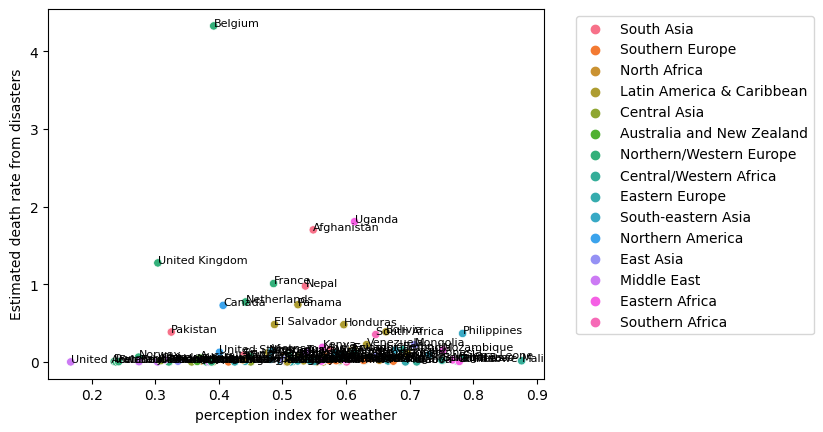

In [ ]:
# Create a scatter plot
sns.scatterplot(data=merged_new, x='Perception_Score_index_weather', y='Death rates from disasters', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['Perception_Score_index_weather'], row['Death rates from disasters'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('perception index for weather')
plt.ylabel('Estimated death rate from disasters')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

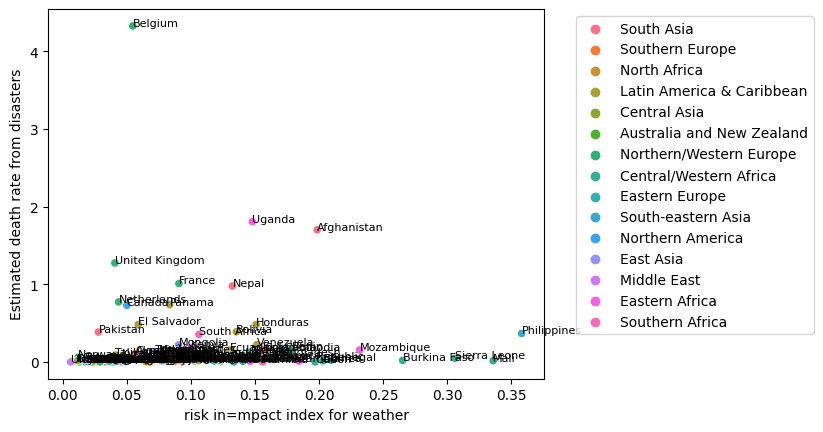

In [ ]:
# Create a scatter plot
sns.scatterplot(data=merged_new, x='risk_impact_index_weather', y='Death rates from disasters', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['risk_impact_index_weather'], row['Death rates from disasters'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('risk in=mpact index for weather')
plt.ylabel('Estimated death rate from disasters')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

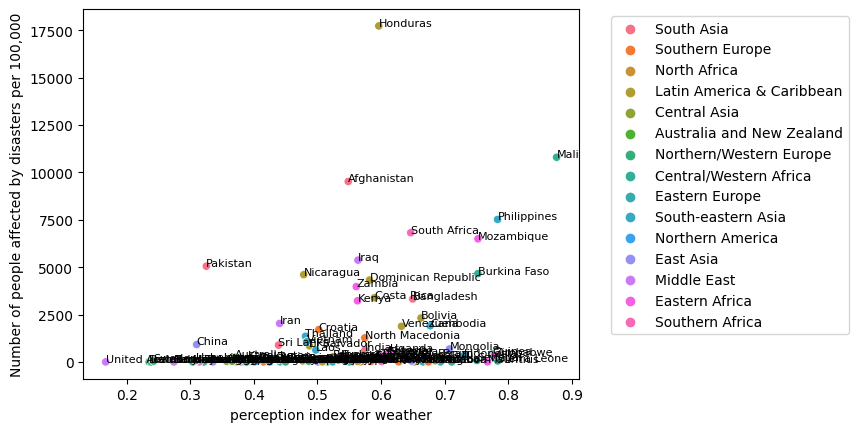

In [ ]:
# Create a scatter plot
sns.scatterplot(data=merged_new, x='Perception_Score_index_weather', y='Number of people affected by disasters per 100,000', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['Perception_Score_index_weather'], row['Number of people affected by disasters per 100,000'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('perception index for weather')
plt.ylabel('Number of people affected by disasters per 100,000')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

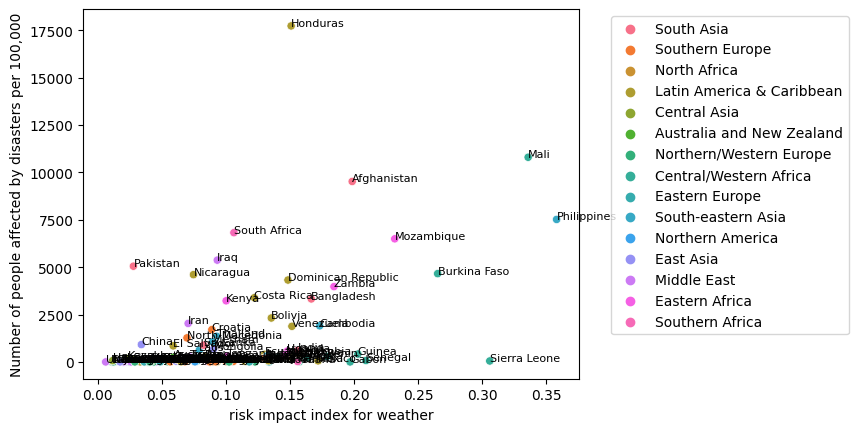

In [ ]:
# Create a scatter plot
sns.scatterplot(data=merged_new, x='risk_impact_index_weather', y='Number of people affected by disasters per 100,000', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['risk_impact_index_weather'], row['Number of people affected by disasters per 100,000'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('risk impact index for weather')
plt.ylabel('Number of people affected by disasters per 100,000')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

From here it begins the comparison of overall perception index, risk impact index and resilience index with ppulation statistical data

In [ ]:
df_pop = pd.read_csv("population.csv")
df_pop

Region, subregion, country or area *    Year  \
0                                    WORLD  1950.0   
1                                    WORLD  1951.0   
2                                    WORLD  1952.0   
3                                    WORLD  1953.0   
4                                    WORLD  1954.0   
...                                    ...     ...   
20591            Wallis and Futuna Islands  2017.0   
20592            Wallis and Futuna Islands  2018.0   
20593            Wallis and Futuna Islands  2019.0   
20594            Wallis and Futuna Islands  2020.0   
20595            Wallis and Futuna Islands  2021.0   

      Total Population (thousands) Population Density (persons per square km)  
0                        2 499 322                                       19.2  
1                        2 543 130                                       19.5  
2                        2 590 271                                       19.9  
3                        2 640 279                                       20.2  
4                        2 691 979                                       20.6  
...                            ...                                        ...  
20591                           12                                       85.3  
20592                           12                                       84.4  
20593                           12                                       83.7  
20594                           12                                       83.2  
20595                           12                                       83.1  

[20596 rows x 4 columns]

In [ ]:
df_pop_2021 = df_pop[df_pop['Year'] == 2021]
df_pop_2021 = df_pop_2021.rename(columns={'Region, subregion, country or area *': 'Country'}) 
df_pop_2021 = df_pop_2021.drop(['Year'], axis=1)
df_pop_2021

Country Total Population (thousands)  \
71                                WORLD                    7 909 295   
144                  Sub-Saharan Africa                    1 137 939   
216    Northern Africa and Western Asia                      545 471   
288           Central and Southern Asia                    2 065 350   
360      Eastern and South-Eastern Asia                    2 339 493   
...                                 ...                          ...   
20307                             Samoa                          219   
20379                           Tokelau                            2   
20451                             Tonga                          106   
20523                            Tuvalu                           11   
20595         Wallis and Futuna Islands                           12   

      Population Density (persons per square km)  
71                                          60.7  
144                                         52.0  
216                                         43.7  
288                                        199.9  
360                                        144.1  
...                                          ...  
20307                                       77.3  
20379                                      154.1  
20451                                      163.1  
20523                                      373.5  
20595                                       83.1  

[286 rows x 3 columns]

In [ ]:
df_pop_2021['Total Population (thousands)'] = df_pop_2021['Total Population (thousands)'].str.replace(' ', '').str.strip()
df_pop_2021['Total Population (thousands)'] = pd.to_numeric(df_pop_2021['Total Population (thousands)'], errors='coerce')
df_pop_2021['Population Density (persons per square km)'] = pd.to_numeric(df_pop_2021['Population Density (persons per square km)'], errors='coerce')
df_pop_2021

Country  Total Population (thousands)  \
71                                WORLD                       7909295   
144                  Sub-Saharan Africa                       1137939   
216    Northern Africa and Western Asia                        545471   
288           Central and Southern Asia                       2065350   
360      Eastern and South-Eastern Asia                       2339493   
...                                 ...                           ...   
20307                             Samoa                           219   
20379                           Tokelau                             2   
20451                             Tonga                           106   
20523                            Tuvalu                            11   
20595         Wallis and Futuna Islands                            12   

       Population Density (persons per square km)  
71                                           60.7  
144                                          52.0  
216                                          43.7  
288                                         199.9  
360                                         144.1  
...                                           ...  
20307                                        77.3  
20379                                       154.1  
20451                                       163.1  
20523                                       373.5  
20595                                        83.1  

[286 rows x 3 columns]

In [ ]:
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Bolivia (Plurinational State of)', 'Bolivia')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Bosnia and Herzegovina', 'Bosnia Herzegovina')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Congo', 'Congo Brazzaville')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Czechia', 'Czech Republic')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Iran (Islamic Republic of)', 'Iran')
df_pop_2021['Country'] = df_pop_2021['Country'].replace("Côte d'Ivoire", 'Ivory Coast')
df_pop_2021['Country'] = df_pop_2021['Country'].replace("Lao People's Democratic Republic", 'Laos')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Republic of Moldova', 'Moldova')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Russian Federation', 'Russia')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Republic of Korea', 'South Korea')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('United Republic of Tanzania', 'Tanzania')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Türkiye', 'Turkey')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('United States of America', 'United States')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela')
df_pop_2021['Country'] = df_pop_2021['Country'].replace('Viet Nam', 'Vietnam')

In [ ]:
merged_new = df_pop_2021.merge(mean_scores, on='Country', how='inner')
merged_new

Country  Total Population (thousands)  \
0            Kenya                         53006   
1        Mauritius                          1299   
2       Mozambique                         32077   
3           Uganda                         45854   
4         Tanzania                         63588   
..             ...                           ...   
113      Venezuela                         28200   
114         Canada                         38155   
115  United States                        336998   
116      Australia                         25921   
117    New Zealand                          5130   

     Population Density (persons per square km)  Perception_Score_index  \
0                                          91.3                0.637747   
1                                         639.9                0.802605   
2                                          40.8                0.732506   
3                                         229.5                0.647147   
4                                          71.8                0.606700   
..                                          ...                     ...   
113                                        30.8                0.647083   
114                                         4.2                0.379914   
115                                        36.8                0.418491   
116                                         3.4                0.361417   
117                                        19.4                0.401000   

     Experience_Score_index  Perception_Score_index_crime  \
0                  0.233910                      0.656408   
1                  0.102497                      0.800916   
2                  0.263099                      0.680968   
3                  0.266600                      0.614573   
4                  0.195854                      0.527692   
..                      ...                           ...   
113                0.197333                      0.711924   
114                0.109349                      0.341609   
115                0.156965                      0.414257   
116                0.109917                      0.318318   
117                0.105833                      0.390500   

     Perception_Score_index_weather  Perception_Score_index_traffic  \
0                          0.562877                        0.695871   
1                          0.767241                        0.846309   
2                          0.752174                        0.776231   
3                          0.613179                        0.713855   
4                          0.599291                        0.699695   
..                              ...                             ...   
113                        0.632000                        0.598000   
114                        0.406746                        0.391261   
115                        0.400995                        0.439741   
116                        0.370500                        0.395896   
117                        0.366000                        0.447395   

     experience_Score_index_crime  experience_Score_index_weather  \
0                        0.229839                        0.177923   
1                        0.049950                        0.112399   
2                        0.215823                        0.308208   
3                        0.246737                        0.241224   
4                        0.177992                        0.168769   
..                            ...                             ...   
113                      0.205750                        0.239740   
114                      0.070437                        0.122768   
115                      0.102341                        0.189055   
116                      0.061373                        0.159159   
117                      0.076500                        0.114250   

     experience_Score_index_traffic  Resilience_Score  \
0            

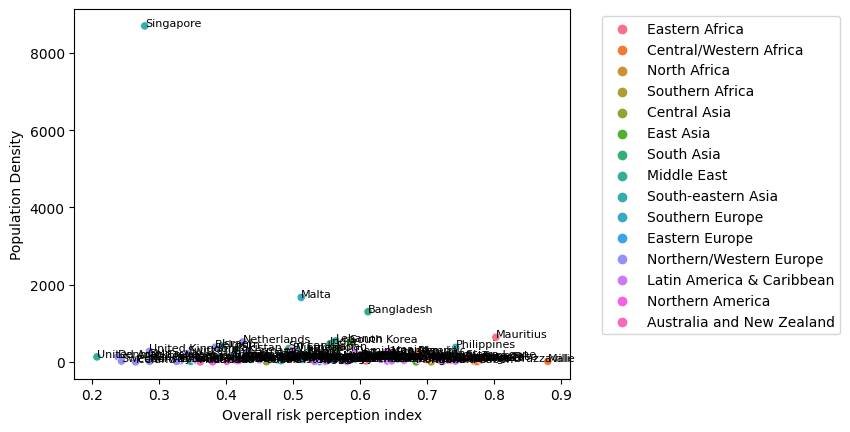

In [ ]:
# Create a scatter plot
sns.scatterplot(data=merged_new, x='Perception_Score_index', y='Population Density (persons per square km)', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['Perception_Score_index'], row['Population Density (persons per square km)'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('Overall risk perception index')
plt.ylabel('Population Density')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

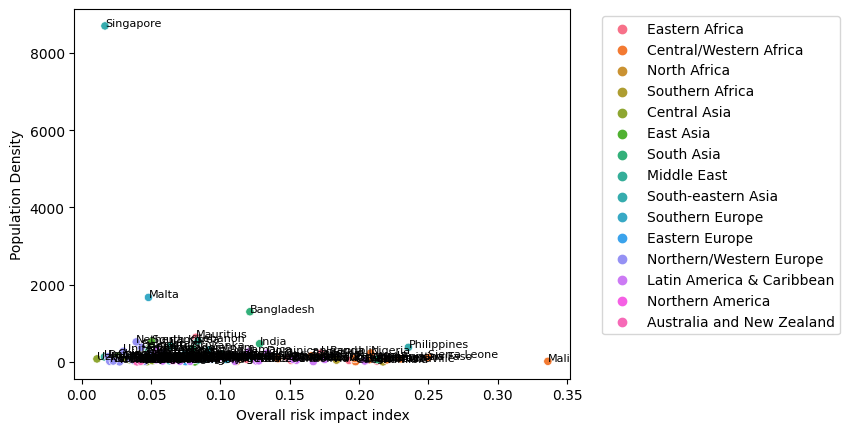

In [ ]:
# Create a scatter plot
sns.scatterplot(data=merged_new, x='risk_impact_index', y='Population Density (persons per square km)', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['risk_impact_index'], row['Population Density (persons per square km)'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('Overall risk impact index')
plt.ylabel('Population Density')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();

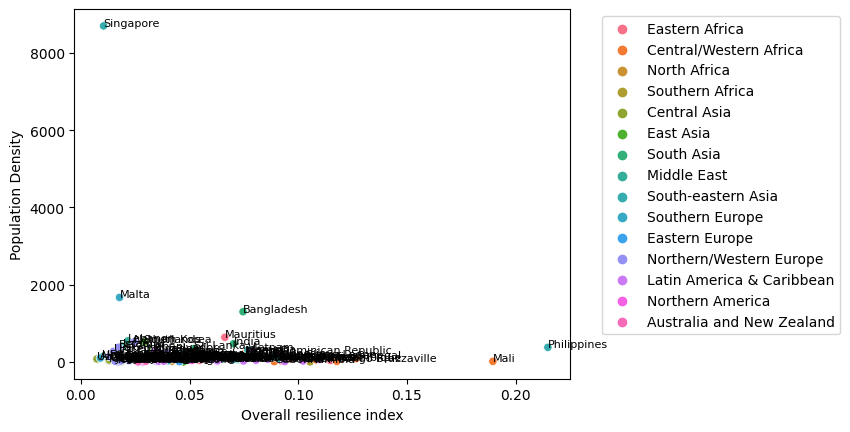

In [ ]:
# Create a scatter plot
sns.scatterplot(data=merged_new, x='resilience_index', y='Population Density (persons per square km)', hue='GlobalRegion')

# Add country names as labels to the points
for i, row in merged_new.iterrows():
    plt.text(row['resilience_index'], row['Population Density (persons per square km)'], row['Country'],  fontsize=8)

# Set x and y axis labels
plt.xlabel('Overall resilience index')
plt.ylabel('Population Density')

# Move legend outside plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show();